<a href="https://colab.research.google.com/github/sayaleedamle/world_income_inequality/blob/main/World_Income_Inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STATS 421 Final Project: World Income Inequality

In [ ]:
# We consider this 'panel/pooled data', due to the data set being both time series and cross-sectional.

# Not all models have to be used, but here are some suggestions:
# Multivariate Time Series Forecasting using LSTM
# Vector Autoregressive Moving Average
# Random Forest Regressor
# Panel OLS

## Load in the Data Set & Necessary Libraries

In [ ]:
# Import data structure & data visualization libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Import machine learning libraries.
# TO BE DONE WHENEVER.
from linearmodels.panel import PanelOLS

In [ ]:
# Import data manipulation and metrics libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Connect the drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load in the data set.
##data = pd.read_excel('/content/drive/MyDrive/UCLA MASDS/STATS 421: Statistical Communication/wiid-data-modified.xlsx')
data = pd.read_csv('/content/drive/MyDrive/UCLA MASDS/STATS 421: Statistical Communication/wiid-data-6.csv')
#data = pd.read_csv("/content/wiid-data-6.csv")
# Reformat the data frame so it looks cleaner.
df = data.copy()
df = df.iloc[:,:16]
df = df.round(3)

/tmp/ipython-input-3899869715.py:3: DtypeWarning: Columns (70,72,74,75,77,79,80,82,84,85,87,89,90,92,94,95,97,99,100,102,104,105,107,109,110,112,114,115,117,119,120,122,124,125,127,129,130,132) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/UCLA MASDS/STATS 421: Statistical Communication/wiid-data-6.csv')


In [ ]:
df.drop('GDP (SHARE)', axis = 1, inplace = True)

## Overview the Data Frame

In [ ]:
# Show the first few entries of the data frame in order to get a feel of its structure.
df.head()

,ISO,COUNTRY,YEAR,GINI INDEX,STANDARD DEVIATION,MIDDLE 50%,TOP 10%,BOTTOM 20%,PALMA RATIO,MIDDLE 50% (MEAN INCOME),TOP 10% (MEAN INCOME),GDP PER CAPITA,GDP GROWTH RATES,GDP (TOTAL),POPULATION
0,ABW,Aruba,2000,52.665,541.865,47.551,41.412,3.455,3.752,37322.539,162519.281,39244.828,6.519,3.483410e+09,88761.0
1,ABW,Aruba,2001,52.668,555.371,47.858,41.205,3.396,3.768,38770.273,166904.641,40505.531,3.212,3.657852e+09,90305.0
2,ABW,Aruba,2002,52.367,540.552,47.974,40.970,3.463,3.705,38231.363,163247.375,39846.059,-1.628,3.641093e+09,91379.0
3,ABW,Aruba,2003,51.968,532.190,48.216,40.580,3.530,3.622,38410.988,161640.422,39832.578,-0.034,3.676945e+09,92310.0
4,ABW,Aruba,2004,51.320,546.963,48.564,39.970,3.680,3.486,40633.160,167214.875,41834.930,5.027,3.899559e+09,93213.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO                       5037 non-null   object 
 1   COUNTRY                   5037 non-null   object 
 2   YEAR                      5037 non-null   int64  
 3   GINI INDEX                5037 non-null   float64
 4   STANDARD DEVIATION        5037 non-null   float64
 5   MIDDLE 50%                5037 non-null   float64
 6   TOP 10%                   5037 non-null   float64
 7   BOTTOM 20%                5037 non-null   float64
 8   PALMA RATIO               5037 non-null   float64
 9   MIDDLE 50% (MEAN INCOME)  5037 non-null   float64
 10  TOP 10% (MEAN INCOME)     5037 non-null   float64
 11  GDP PER CAPITA            5037 non-null   float64
 12  GDP GROWTH RATES          5037 non-null   float64
 13  GDP (TOTAL)               5037 non-null   float64
 14  POPULATI

In [ ]:
# Although summary statistics may not be useful for this type of data frame, show them anyways.
df.iloc[:,3:].describe().T

,count,mean,std,min,25%,50%,75%,max
GINI INDEX,5037.0,4.375187e+01,1.054574e+01,0.000,3.511600e+01,4.334000e+01,5.195900e+01,7.422500e+01
STANDARD DEVIATION,5037.0,2.032000e+02,1.872348e+02,0.000,5.714300e+01,1.492800e+02,3.005580e+02,1.298691e+03
MIDDLE 50%,5037.0,5.098627e+01,5.370644e+00,30.596,4.768500e+01,5.151500e+01,5.428700e+01,9.950000e+01
TOP 10%,5037.0,3.426272e+01,8.719983e+00,0.100,2.678000e+01,3.350000e+01,4.084700e+01,6.517400e+01
BOTTOM 20%,5037.0,5.318546e+00,3.511504e+00,0.200,3.521000e+00,5.109000e+00,6.757000e+00,5.529400e+01
PALMA RATIO,5037.0,2.975034e+00,3.467344e+00,0.250,1.446000e+00,2.254000e+00,3.622000e+00,5.529400e+01
MIDDLE 50% (MEAN INCOME),5037.0,2.485843e+04,2.719277e+04,18.830,4.759808e+03,1.454314e+04,3.819148e+04,1.927658e+05
TOP 10% (MEAN INCOME),5037.0,6.950591e+04,6.582944e+04,18.830,1.783838e+04,4.872701e+04,1.043784e+05,4.315192e+05
GDP PER CAPITA,5037.0,2.343657e+04,2.469236e+04,7.230,4.856810e+03,1.439715e+04,3.577094e+04,1.743391e+05
GDP GROWTH RATES,5037.0,2.032134e+00,5.596046e+00,-55.229,-9.000000e-03,2.180000e+00,4.402000e+00,9.178100e+01


## Analyze the Data Frame (Countries)


In [ ]:
# Segment the data frame into subsets representing each country/region.
countries_dict = {}

for i in range(0, len(df) + 1, 23):
  if (i == len(df)):
    break
  country_name = df.iloc[i, 1]
  countries_dict[country_name] = df.iloc[i:i+23,:]

In [ ]:
regions_dict = {k: countries_dict[k] for k in ('East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 'Middle East and North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa', 'World')}

In [ ]:
countries_dict.pop('East Asia and the Pacific')
countries_dict.pop('Europe and Central Asia')
countries_dict.pop('Latin America and the Caribbean')
countries_dict.pop('Middle East and North Africa')
countries_dict.pop('North America')
countries_dict.pop('South Asia')
countries_dict.pop('Sub-Saharan Africa')
countries_dict.pop('World')


,ISO,COUNTRY,YEAR,GINI INDEX,STANDARD DEVIATION,MIDDLE 50%,TOP 10%,BOTTOM 20%,PALMA RATIO,MIDDLE 50% (MEAN INCOME),TOP 10% (MEAN INCOME),GDP PER CAPITA,GDP GROWTH RATES,GDP (TOTAL),POPULATION
5014,world-world,World,2000,68.289,236.201,42.068,53.335,1.307,11.602,10698.460,67855.609,12749.050,3.352,7.864134e+13,6.168408e+09
5015,world-world,World,2001,67.975,238.462,42.385,52.952,1.308,11.354,10888.540,68165.680,12883.870,1.057,8.054479e+13,6.251599e+09
5016,world-world,World,2002,67.601,239.672,42.751,52.514,1.323,11.091,11137.929,68498.000,13059.760,1.365,8.272512e+13,6.334353e+09
5017,world-world,World,2003,67.166,240.947,43.228,51.939,1.355,10.747,11524.063,69053.039,13362.180,2.316,8.574436e+13,6.416944e+09
5018,world-world,World,2004,66.756,247.667,43.744,51.386,1.366,10.553,12097.648,71144.445,13876.960,3.853,9.019919e+13,6.499924e+09
5019,world-world,World,2005,66.321,253.785,44.116,50.862,1.375,10.127,12615.750,72643.891,14333.670,3.291,9.436546e+13,6.583483e+09
5020,world-world,World,2006,65.807,261.129,44.563,50.295,1.405,9.782,13247.514,74496.219,14889.610,3.879,9.928278e+13,6.667923e+09
5021,world-world,World,2007,65.197,266.670,45.266,49.484,1.425,9.425,13974.231,76422.531,15467.920,3.884,1.044650e+14,6.753656e+09
5022,world-world,World,2008,64.578,262.970,45.951,48.701,1.441,9.107,14401.309,76140.609,15700.370,1.503,1.074028e+14,6.840779e+09
5023,world-world,World,2009,63.477,251.925,46.584,47.722,1.526,8.380,14321.671,73333.492,15395.260,-1.943,1.066748e+14,6.929070e+09


In [ ]:
regions_dict['World']

,ISO,COUNTRY,YEAR,GINI INDEX,STANDARD DEVIATION,MIDDLE 50%,TOP 10%,BOTTOM 20%,PALMA RATIO,MIDDLE 50% (MEAN INCOME),TOP 10% (MEAN INCOME),GDP PER CAPITA,GDP GROWTH RATES,GDP (TOTAL),POPULATION
5014,world-world,World,2000,68.289,236.201,42.068,53.335,1.307,11.602,10698.460,67855.609,12749.050,3.352,7.864134e+13,6.168408e+09
5015,world-world,World,2001,67.975,238.462,42.385,52.952,1.308,11.354,10888.540,68165.680,12883.870,1.057,8.054479e+13,6.251599e+09
5016,world-world,World,2002,67.601,239.672,42.751,52.514,1.323,11.091,11137.929,68498.000,13059.760,1.365,8.272512e+13,6.334353e+09
5017,world-world,World,2003,67.166,240.947,43.228,51.939,1.355,10.747,11524.063,69053.039,13362.180,2.316,8.574436e+13,6.416944e+09
5018,world-world,World,2004,66.756,247.667,43.744,51.386,1.366,10.553,12097.648,71144.445,13876.960,3.853,9.019919e+13,6.499924e+09
5019,world-world,World,2005,66.321,253.785,44.116,50.862,1.375,10.127,12615.750,72643.891,14333.670,3.291,9.436546e+13,6.583483e+09
5020,world-world,World,2006,65.807,261.129,44.563,50.295,1.405,9.782,13247.514,74496.219,14889.610,3.879,9.928278e+13,6.667923e+09
5021,world-world,World,2007,65.197,266.670,45.266,49.484,1.425,9.425,13974.231,76422.531,15467.920,3.884,1.044650e+14,6.753656e+09
5022,world-world,World,2008,64.578,262.970,45.951,48.701,1.441,9.107,14401.309,76140.609,15700.370,1.503,1.074028e+14,6.840779e+09
5023,world-world,World,2009,63.477,251.925,46.584,47.722,1.526,8.380,14321.671,73333.492,15395.260,-1.943,1.066748e+14,6.929070e+09


In [ ]:
# Capture the Gini Index % change between 2000 and 2022 for each country/region.
countries_gini_change = {}
for key, value in countries_dict.items():
  percent_change = np.round(100.0 * (value.iloc[-1, 3] - value.iloc[0, 3]) / value.iloc[0, 3], 2)
  countries_gini_change[key] = percent_change

/tmp/ipython-input-2828530529.py:4: RuntimeWarning: invalid value encountered in scalar divide
  percent_change = np.round(100.0 * (value.iloc[-1, 3] - value.iloc[0, 3]) / value.iloc[0, 3], 2)


In [ ]:
countries_gini_change_sorted = sorted(countries_gini_change.items(), key=lambda item: item[1], reverse=True)
top_10_gini_change = countries_gini_change_sorted[:10]
bottom_10_gini_change = countries_gini_change_sorted[-10:]

print('Top 10 countries by gini percentage change:\n')
for key, value in dict(top_10_gini_change).items():
  print(f'{key}: {value}')

print('\n')
print('-' * 50)

print('Bottom 10 countries by gini percentage change:\n')
for key, value in dict(bottom_10_gini_change).items():
  print(f'{key}: {value}')

Top 10 countries by gini percentage change:

Bulgaria: 26.76
Denmark: 24.28
Sweden: 17.29
Saint Lucia: 14.58
Bosnia and Herzegovina: 13.6
Indonesia: 12.24
Luxembourg: 11.4
Laos: 10.47
Bangladesh: 10.22
Malta: 9.96


--------------------------------------------------
Bottom 10 countries by gini percentage change:

Maldives: -16.53
Mexico: -17.62
Russia: -19.74
Moldova: -19.75
Malawi: -21.06
Tonga: -21.11
El Salvador: -23.53
Nigeria: -24.46
Mali: -31.5
Seychelles: -40.47


/tmp/ipython-input-1656066145.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


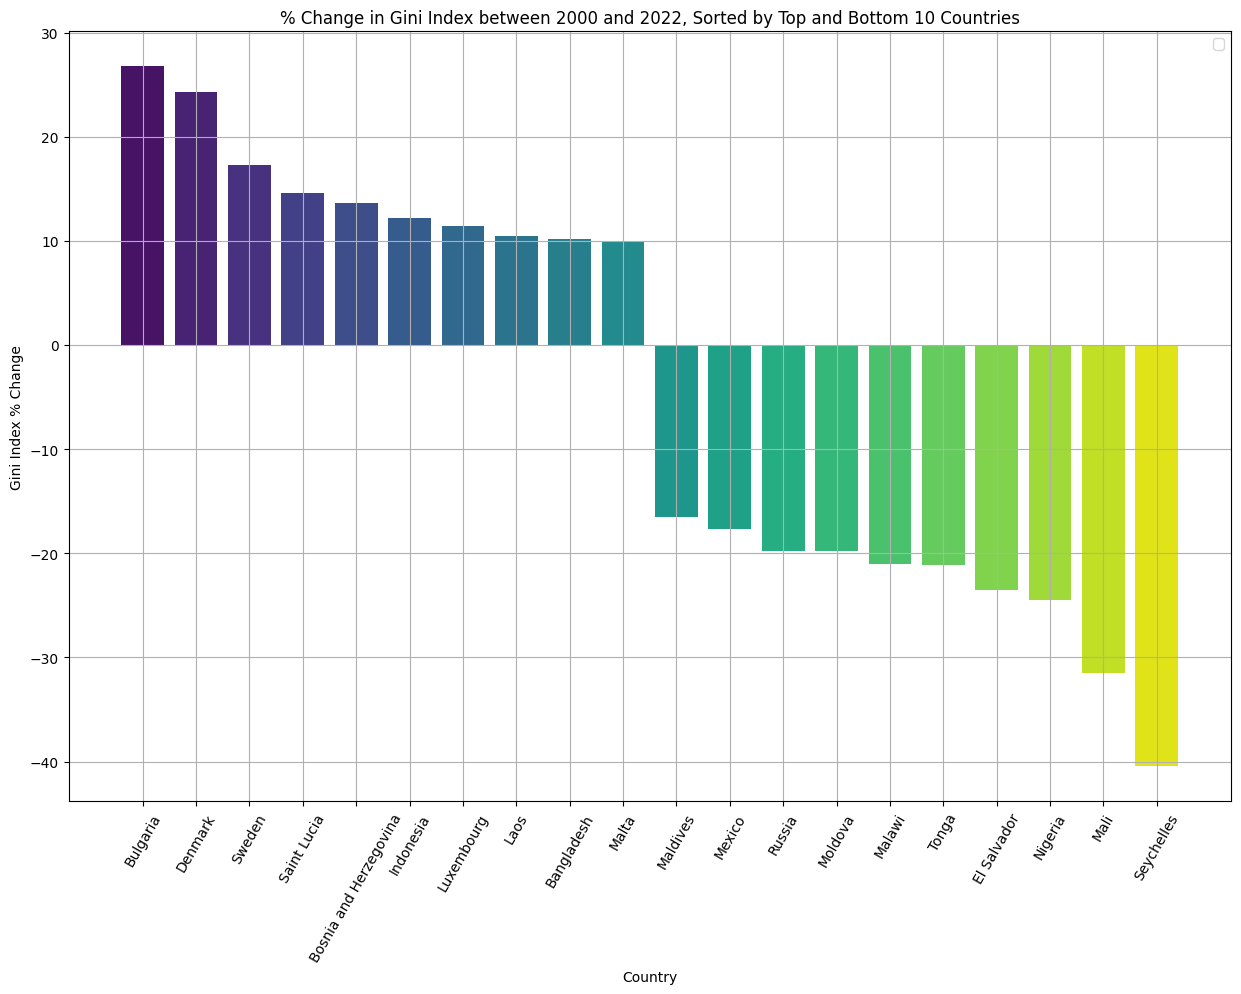

In [ ]:
# Plot the % change in Gini Index for those countries.
merge_gini = dict(top_10_gini_change) | dict(bottom_10_gini_change)

colors = sns.color_palette('viridis', len(merge_gini))

plt.figure(figsize = (15, 10))
plt.xticks(rotation = 60)
plt.bar(x = merge_gini.keys(), height = merge_gini.values(), color = colors)
plt.xlabel('Country')
plt.ylabel('Gini Index % Change')

plt.legend()
plt.grid(True)

plt.title('% Change in Gini Index between 2000 and 2022, Sorted by Top and Bottom 10 Countries')
plt.show()


In [ ]:
# Capture the GDP per capita % change between 2000 and 2022 for each country/region.
countries_gdp_capita_change = {}
for key, value in countries_dict.items():
  percent_change = np.round(100.0 * (value.iloc[-1, -4] - value.iloc[0, -4]) / value.iloc[0, -4], 2)
  countries_gdp_capita_change[key] = percent_change

In [ ]:
countries_gdp_capita_change_sorted = sorted(countries_gdp_capita_change.items(), key=lambda item: item[1], reverse=True)
top_10_gdp_capita_change = countries_gdp_capita_change_sorted[:10]
bottom_10_gdp_capita_change = countries_gdp_capita_change_sorted[-10:]

print('Top 10 countries by gdp per capita percentage change:\n')
for key, value in dict(top_10_gdp_capita_change).items():
  print(f'{key}: {value}')

print('\n')
print('-' * 50)

print('Bottom 10 countries by gdp per capita percentage change:\n')
for key, value in dict(bottom_10_gdp_capita_change).items():
  print(f'{key}: {value}')

Top 10 countries by gdp per capita percentage change:

China: 426.73
Guyana: 361.89
Myanmar: 293.44
Armenia: 289.76
Azerbaijan: 277.85
Georgia: 267.43
Cambodia: 235.93
Turkmenistan: 234.86
Eritrea: 227.74
Ethiopia: 227.74


--------------------------------------------------
Bottom 10 countries by gdp per capita percentage change:

Zimbabwe: -18.37
Cayman Islands: -18.82
Curacao: -20.35
British Virgin Islands: -21.76
Brunei: -23.89
United Arab Emirates: -25.59
Libya: -35.43
Syria: -42.94
Yemen: -53.48
Venezuela: -62.36


/tmp/ipython-input-4165642117.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


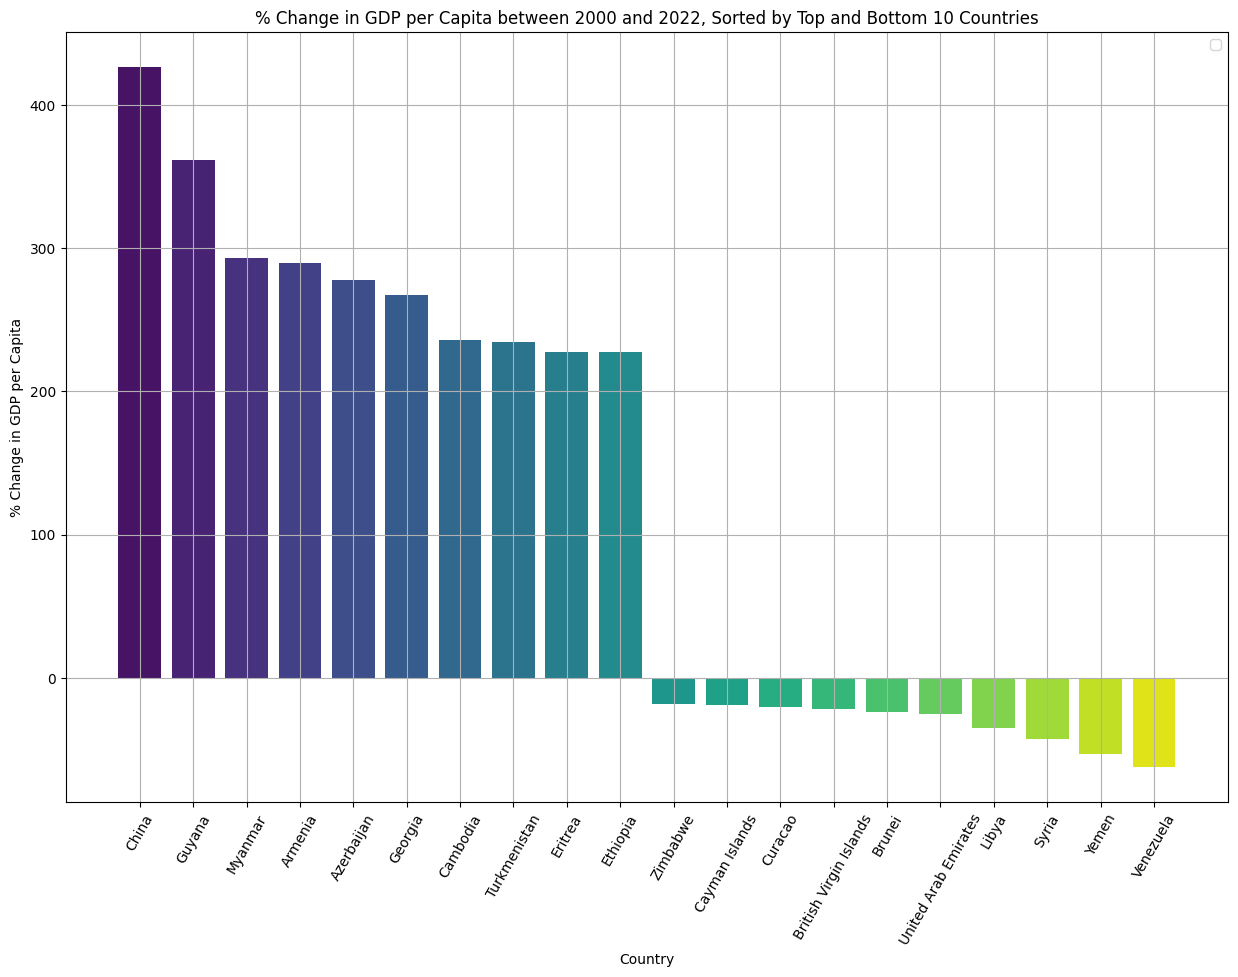

In [ ]:
# Plot the % change in GDP per Capita for those countries.
merge_capita = dict(top_10_gdp_capita_change) | dict(bottom_10_gdp_capita_change)

colors = sns.color_palette('viridis', len(merge_gini))

plt.figure(figsize = (15, 10))
plt.xticks(rotation = 60)
plt.bar(x = merge_capita.keys(), height = merge_capita.values(), color = colors)
plt.xlabel('Country')
plt.ylabel('% Change in GDP per Capita')

plt.legend()
plt.grid(True)

plt.title('% Change in GDP per Capita between 2000 and 2022, Sorted by Top and Bottom 10 Countries')
plt.show()


In [ ]:
# Capture the top 10 % income share % change between 2000 and 2022 for each country/region.
countries_top10_share_change = {}
for key, value in countries_dict.items():
  percent_change = np.round(value.iloc[-1, 6] - value.iloc[0, 6], 2)
  countries_top10_share_change[key] = percent_change

In [ ]:
countries_top10_share_change_sorted = sorted(countries_top10_share_change.items(), key=lambda item: item[1], reverse=True)
top_10_top10_share_change = countries_top10_share_change_sorted[:10]
bottom_10_top10_share_change = countries_top10_share_change_sorted[-10:]

print('Top 10 countries by top 10% income share change:\n')
for key, value in dict(top_10_top10_share_change).items():
  print(f'{key}: {value}')

print('\n')
print('-' * 50)

print('Bottom 10 countries by top 10% income share change:\n')
for key, value in dict(bottom_10_top10_share_change).items():
  print(f'{key}: {value}')

Top 10 countries by top 10% income share change:

Sao Tome and Principe: 6.54
Somalia: 6.27
Bulgaria: 5.76
Zambia: 5.45
Denmark: 4.64
Saint Lucia: 4.64
Bangladesh: 3.95
Barbados: 3.8
Malta: 3.76
Tanzania: 3.43


--------------------------------------------------
Bottom 10 countries by top 10% income share change:

Zimbabwe: -10.66
Dominican Republic: -10.69
Comoros: -11.13
Ecuador: -11.65
Azerbaijan: -14.15
Mali: -14.52
Malawi: -17.1
Micronesia, Federated States of: -17.47
Bolivia: -18.02
Seychelles: -19.38


In [ ]:
# Capture the Palma Ratio change between 2000 and 2022 for each country/region.
countries_palma_change = {}
for key, value in countries_dict.items():
  percent_change = np.round(value.iloc[-1, 8] - value.iloc[0, 8], 2)
  countries_palma_change[key] = percent_change

In [ ]:
countries_palma_change_sorted = sorted(countries_palma_change.items(), key=lambda item: item[1], reverse=True)
top_10_palma_change = countries_palma_change_sorted[:10]
bottom_10_palma_change = countries_palma_change_sorted[-10:]

print('Top 10 countries by palma ratio change:\n')
for key, value in dict(top_10_palma_change).items():
  print(f'{key}: {value}')

print('\n')
print('-' * 50)

print('Bottom 10 countries by palma ratio change:\n')
for key, value in dict(bottom_10_palma_change).items():
  print(f'{key}: {value}')

Top 10 countries by palma ratio change:

Zambia: 4.86
Somalia: 1.59
Sao Tome and Principe: 1.36
Saint Lucia: 1.08
Mozambique: 1.01
Eswatini: 0.93
Ghana: 0.87
Congo, Republic of the: 0.84
Haiti: 0.83
Barbados: 0.73


--------------------------------------------------
Bottom 10 countries by palma ratio change:

Cape Verde: -3.23
Namibia: -3.27
Mali: -3.34
Botswana: -3.38
Comoros: -3.39
Malawi: -5.07
Lesotho: -5.18
Zimbabwe: -5.65
Micronesia, Federated States of: -5.98
Bolivia: -6.17


/tmp/ipython-input-4109642431.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


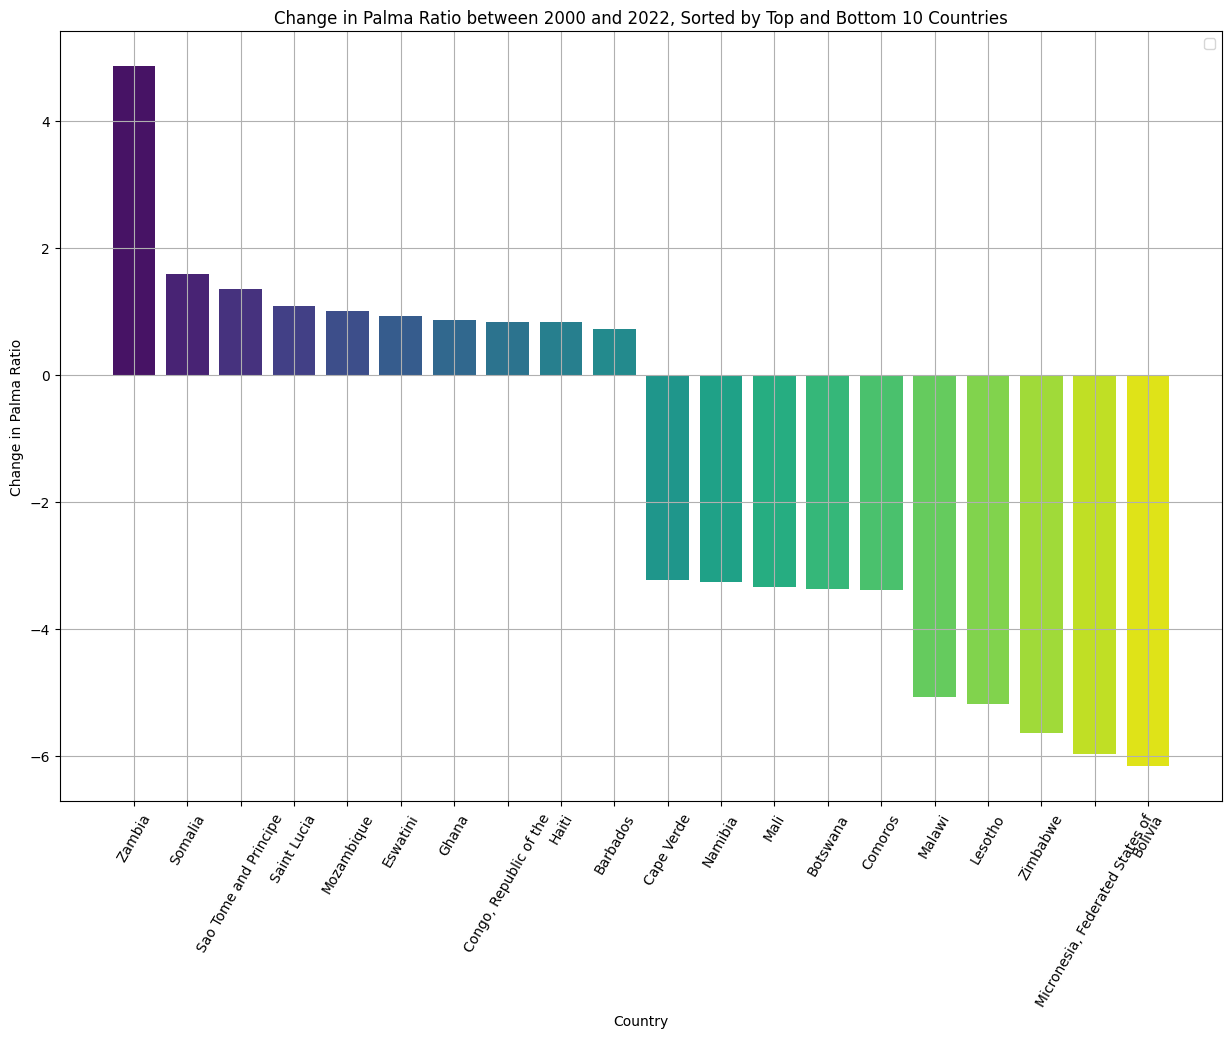

In [ ]:
# Plot the change in Palma Ratio for those countries.
merge_palma = dict(top_10_palma_change) | dict(bottom_10_palma_change)

colors = sns.color_palette('viridis', len(merge_gini))

plt.figure(figsize = (15, 10))
plt.xticks(rotation = 60)
plt.bar(x = merge_palma.keys(), height = merge_palma.values(), color = colors)
plt.xlabel('Country')
plt.ylabel('Change in Palma Ratio')

plt.legend()
plt.grid(True)

plt.title('Change in Palma Ratio between 2000 and 2022, Sorted by Top and Bottom 10 Countries')
plt.show()


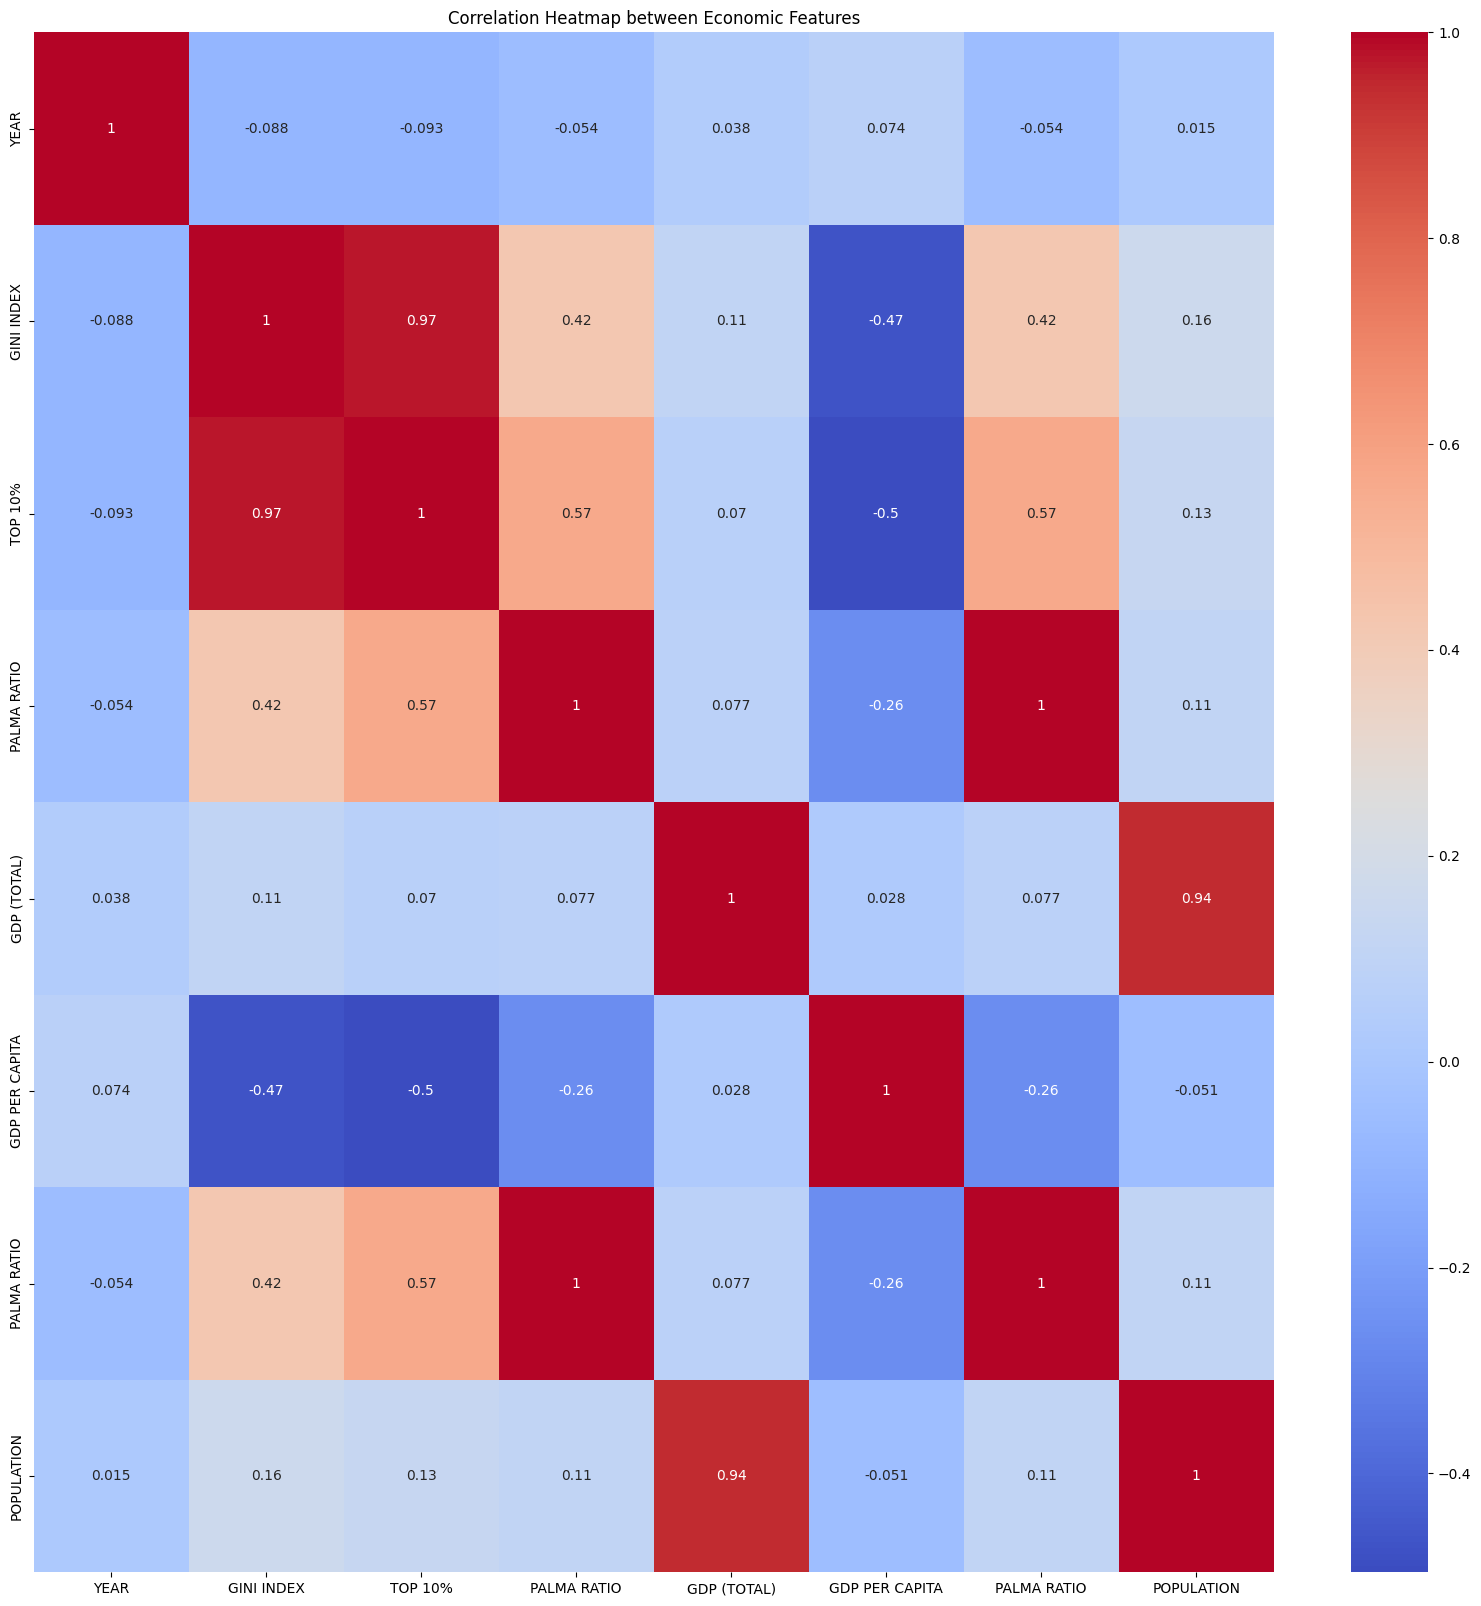

In [ ]:
plt.figure(figsize = (20, 20))
general_corr = df[['YEAR', 'GINI INDEX', 'TOP 10%', 'PALMA RATIO', 'GDP (TOTAL)', 'GDP PER CAPITA', 'PALMA RATIO', 'POPULATION']].corr(numeric_only = True)
sns.heatmap(general_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap between Economic Features')
plt.show()

## Analyze the Data Frame (Regions)

In [ ]:
# Capture the Gini Index % change between 2000 and 2022 for each country/region.
region_gini_change = {}
for key, value in regions_dict.items():
  percent_change = np.round(100.0 * (value.iloc[-1, 3] - value.iloc[0, 3]) / value.iloc[0, 3], 2)
  region_gini_change[key] = percent_change

In [ ]:
region_gdp_capita_change = {}
for key, value in regions_dict.items():
  percent_change = np.round(100.0 * (value.iloc[-1, -4] - value.iloc[0, -4]) / value.iloc[0, -4], 2)
  region_gdp_capita_change[key] = percent_change

In [ ]:
region_palma_change = {}
for key, value in regions_dict.items():
  percent_change = np.round(value.iloc[-1, 8] - value.iloc[0, 8], 2)
  region_palma_change[key] = percent_change

In [ ]:
#region_gini_change = {k: countries_gini_change[k] for k in ('East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 'Middle East and North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa')}
#region_gdp_capita_change = {k: countries_gdp_capita_change[k] for k in ('East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 'Middle East and North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa')}
#region_palma_change = {k: countries_palma_change[k] for k in ('East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 'Middle East and North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa')}

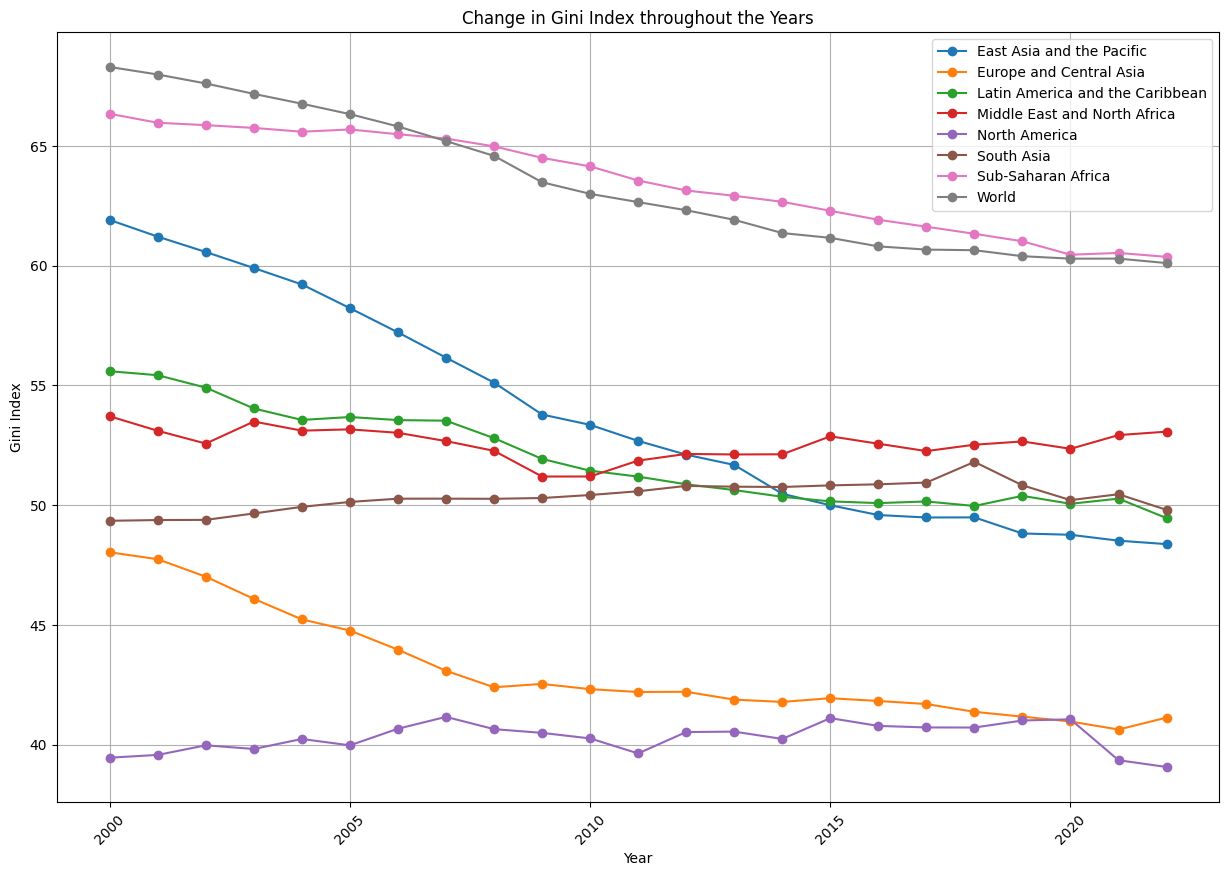

In [ ]:
# Plot the change in Gini Index throughout the years for each region.
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
for key, value in regions_dict.items():
  plt.plot(value.iloc[:, 2], value.iloc[:, 3], marker = 'o', label = key)

plt.xlabel('Year')
plt.ylabel('Gini Index')

plt.legend()
plt.grid(True)

plt.title('Change in Gini Index throughout the Years')
plt.show()


/tmp/ipython-input-3992351649.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


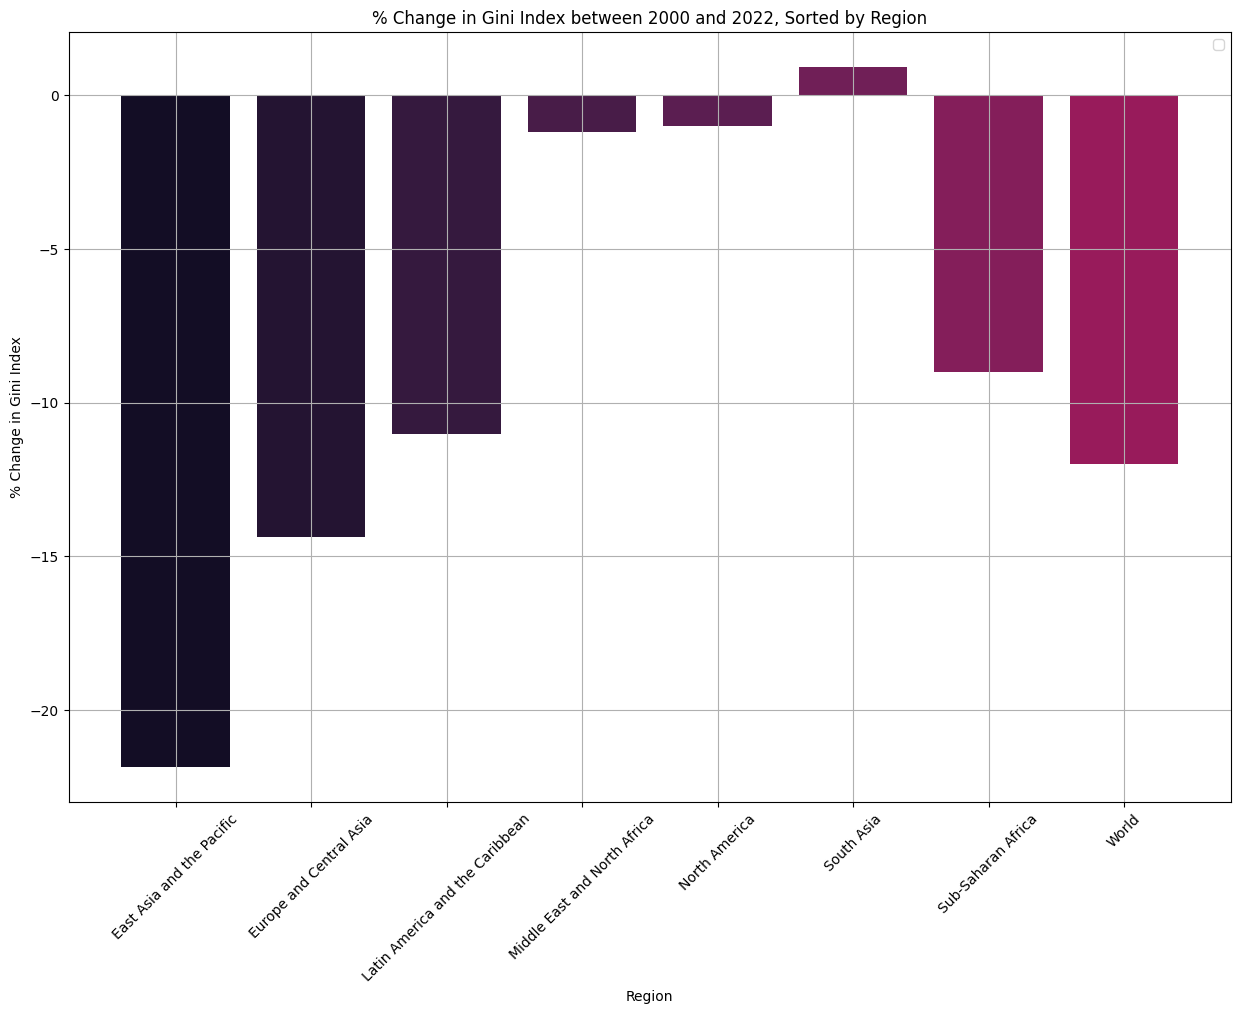

In [ ]:
colors = sns.color_palette('rocket', len(merge_gini))

plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
plt.bar(x = region_gini_change.keys(), height = region_gini_change.values(), color = colors)
plt.xlabel('Region')
plt.ylabel('% Change in Gini Index')

plt.legend()
plt.grid(True)

plt.title('% Change in Gini Index between 2000 and 2022, Sorted by Region')
plt.show()


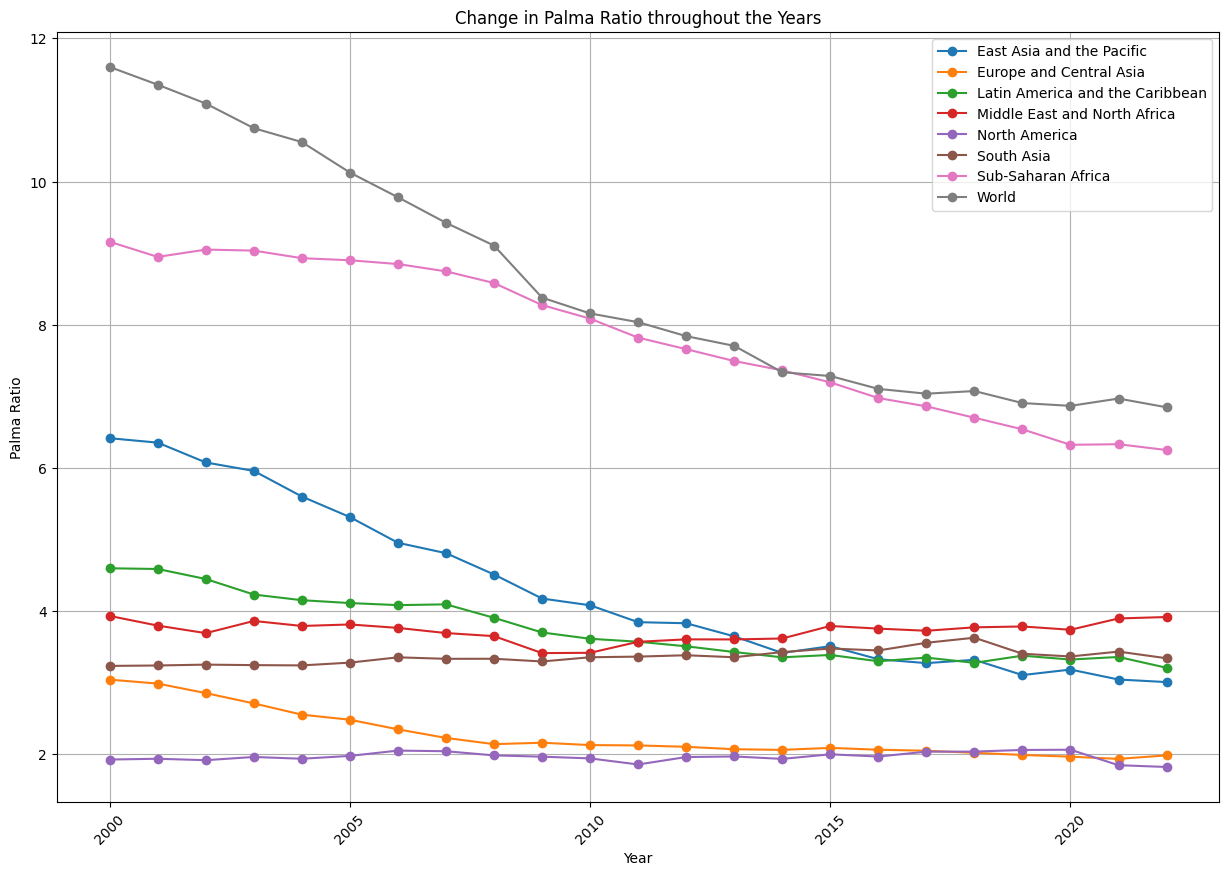

In [ ]:
# Plot the change in the Palma Ratio throughout the years for each region.
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
for key, value in regions_dict.items():
  plt.plot(value.iloc[:, 2], value.iloc[:, 8], marker = 'o', label = key)

plt.xlabel('Year')
plt.ylabel('Palma Ratio')

plt.legend()
plt.grid(True)

plt.title('Change in Palma Ratio throughout the Years')
plt.show()


/tmp/ipython-input-1148444282.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


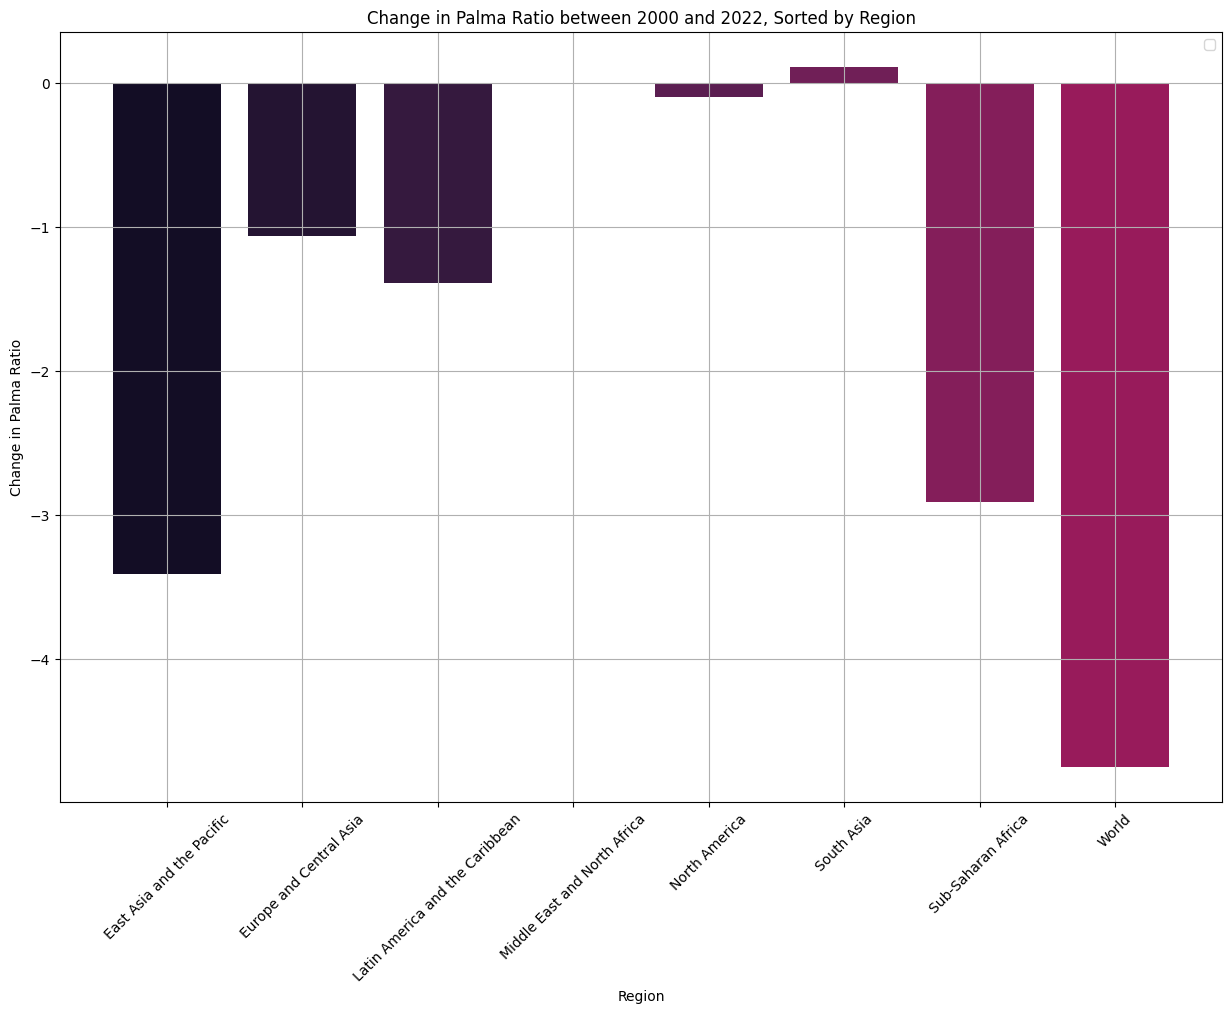

In [ ]:
colors = sns.color_palette('rocket', len(merge_gini))

plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
plt.bar(x = region_palma_change.keys(), height = region_palma_change.values(), color = colors)
plt.xlabel('Region')
plt.ylabel('Change in Palma Ratio')

plt.legend()
plt.grid(True)

plt.title('Change in Palma Ratio between 2000 and 2022, Sorted by Region')
plt.show()


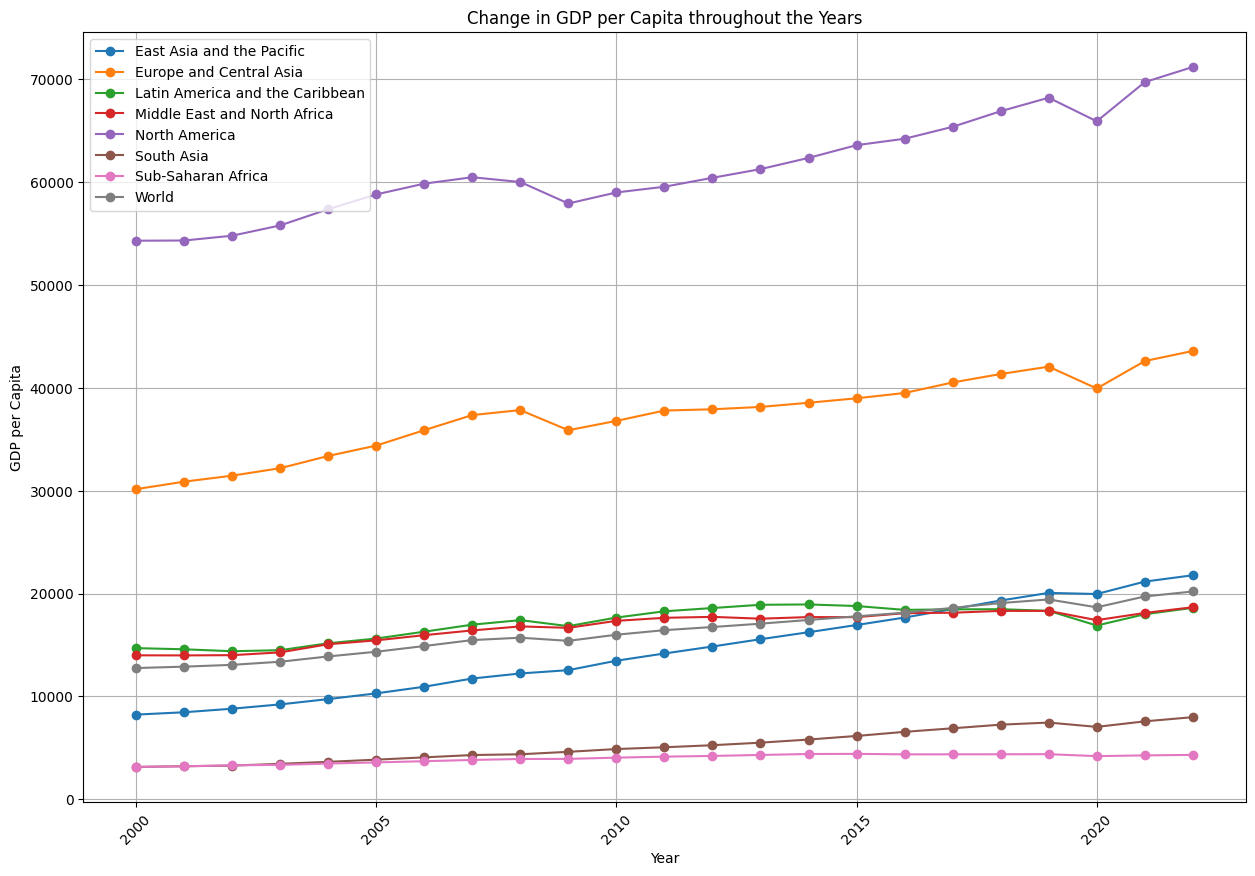

In [ ]:
# Plot the change in GDP per capita throughout the years for each region.
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
for key, value in regions_dict.items():
  plt.plot(value.iloc[:, 2], value.iloc[:, -4], marker = 'o', label = key)

plt.xlabel('Year')
plt.ylabel('GDP per Capita')

plt.legend()
plt.grid(True)

plt.title('Change in GDP per Capita throughout the Years')
plt.show()


/tmp/ipython-input-2451775774.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


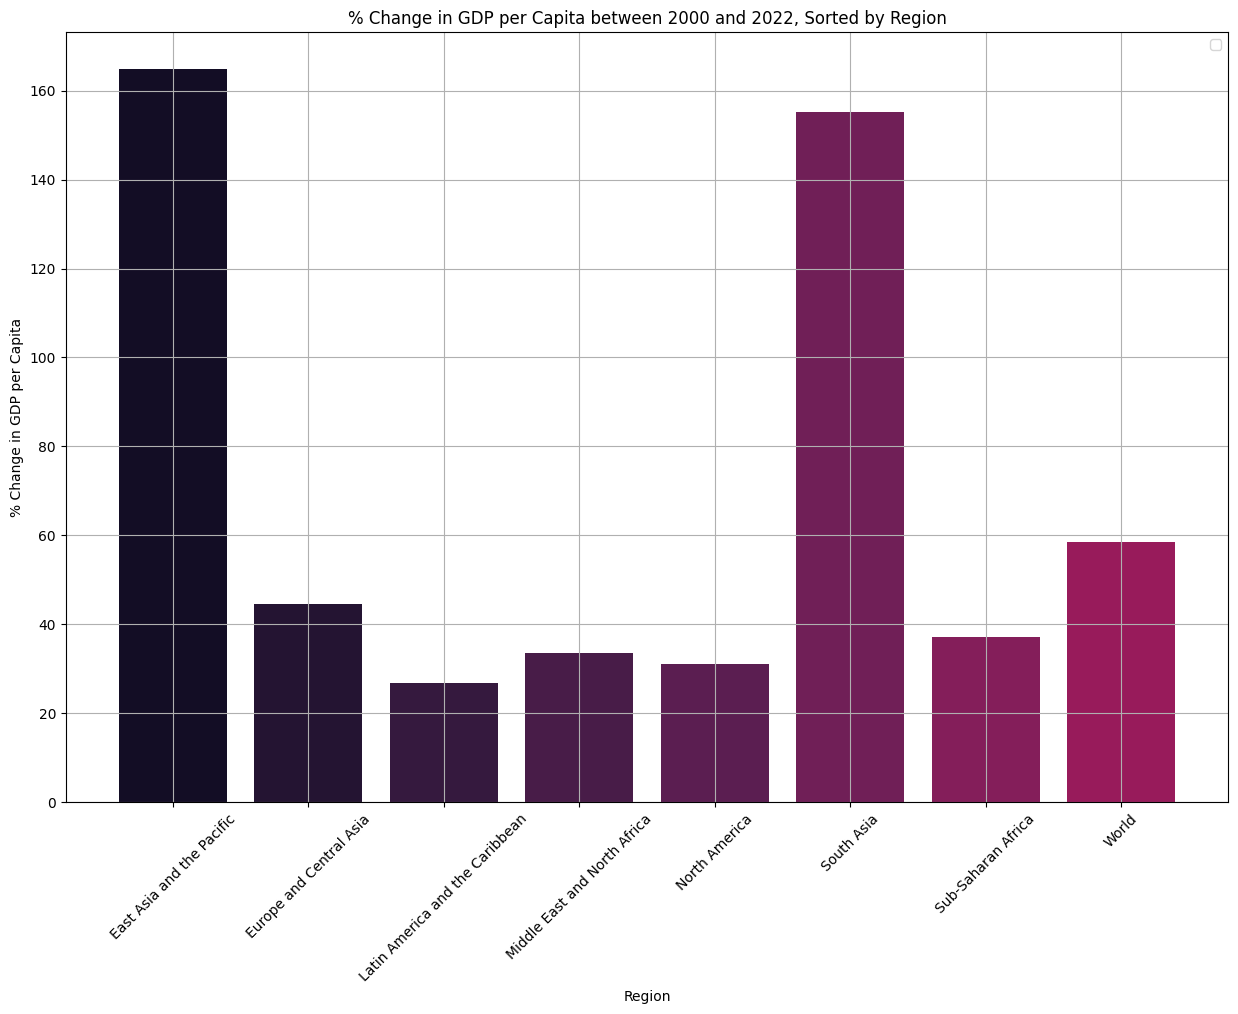

In [ ]:
colors = sns.color_palette('rocket', len(merge_gini))

plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
plt.bar(x = region_gdp_capita_change.keys(), height = region_gdp_capita_change.values(), color = colors)
plt.xlabel('Region')
plt.ylabel('% Change in GDP per Capita')

plt.legend()
plt.grid(True)

plt.title('% Change in GDP per Capita between 2000 and 2022, Sorted by Region')
plt.show()


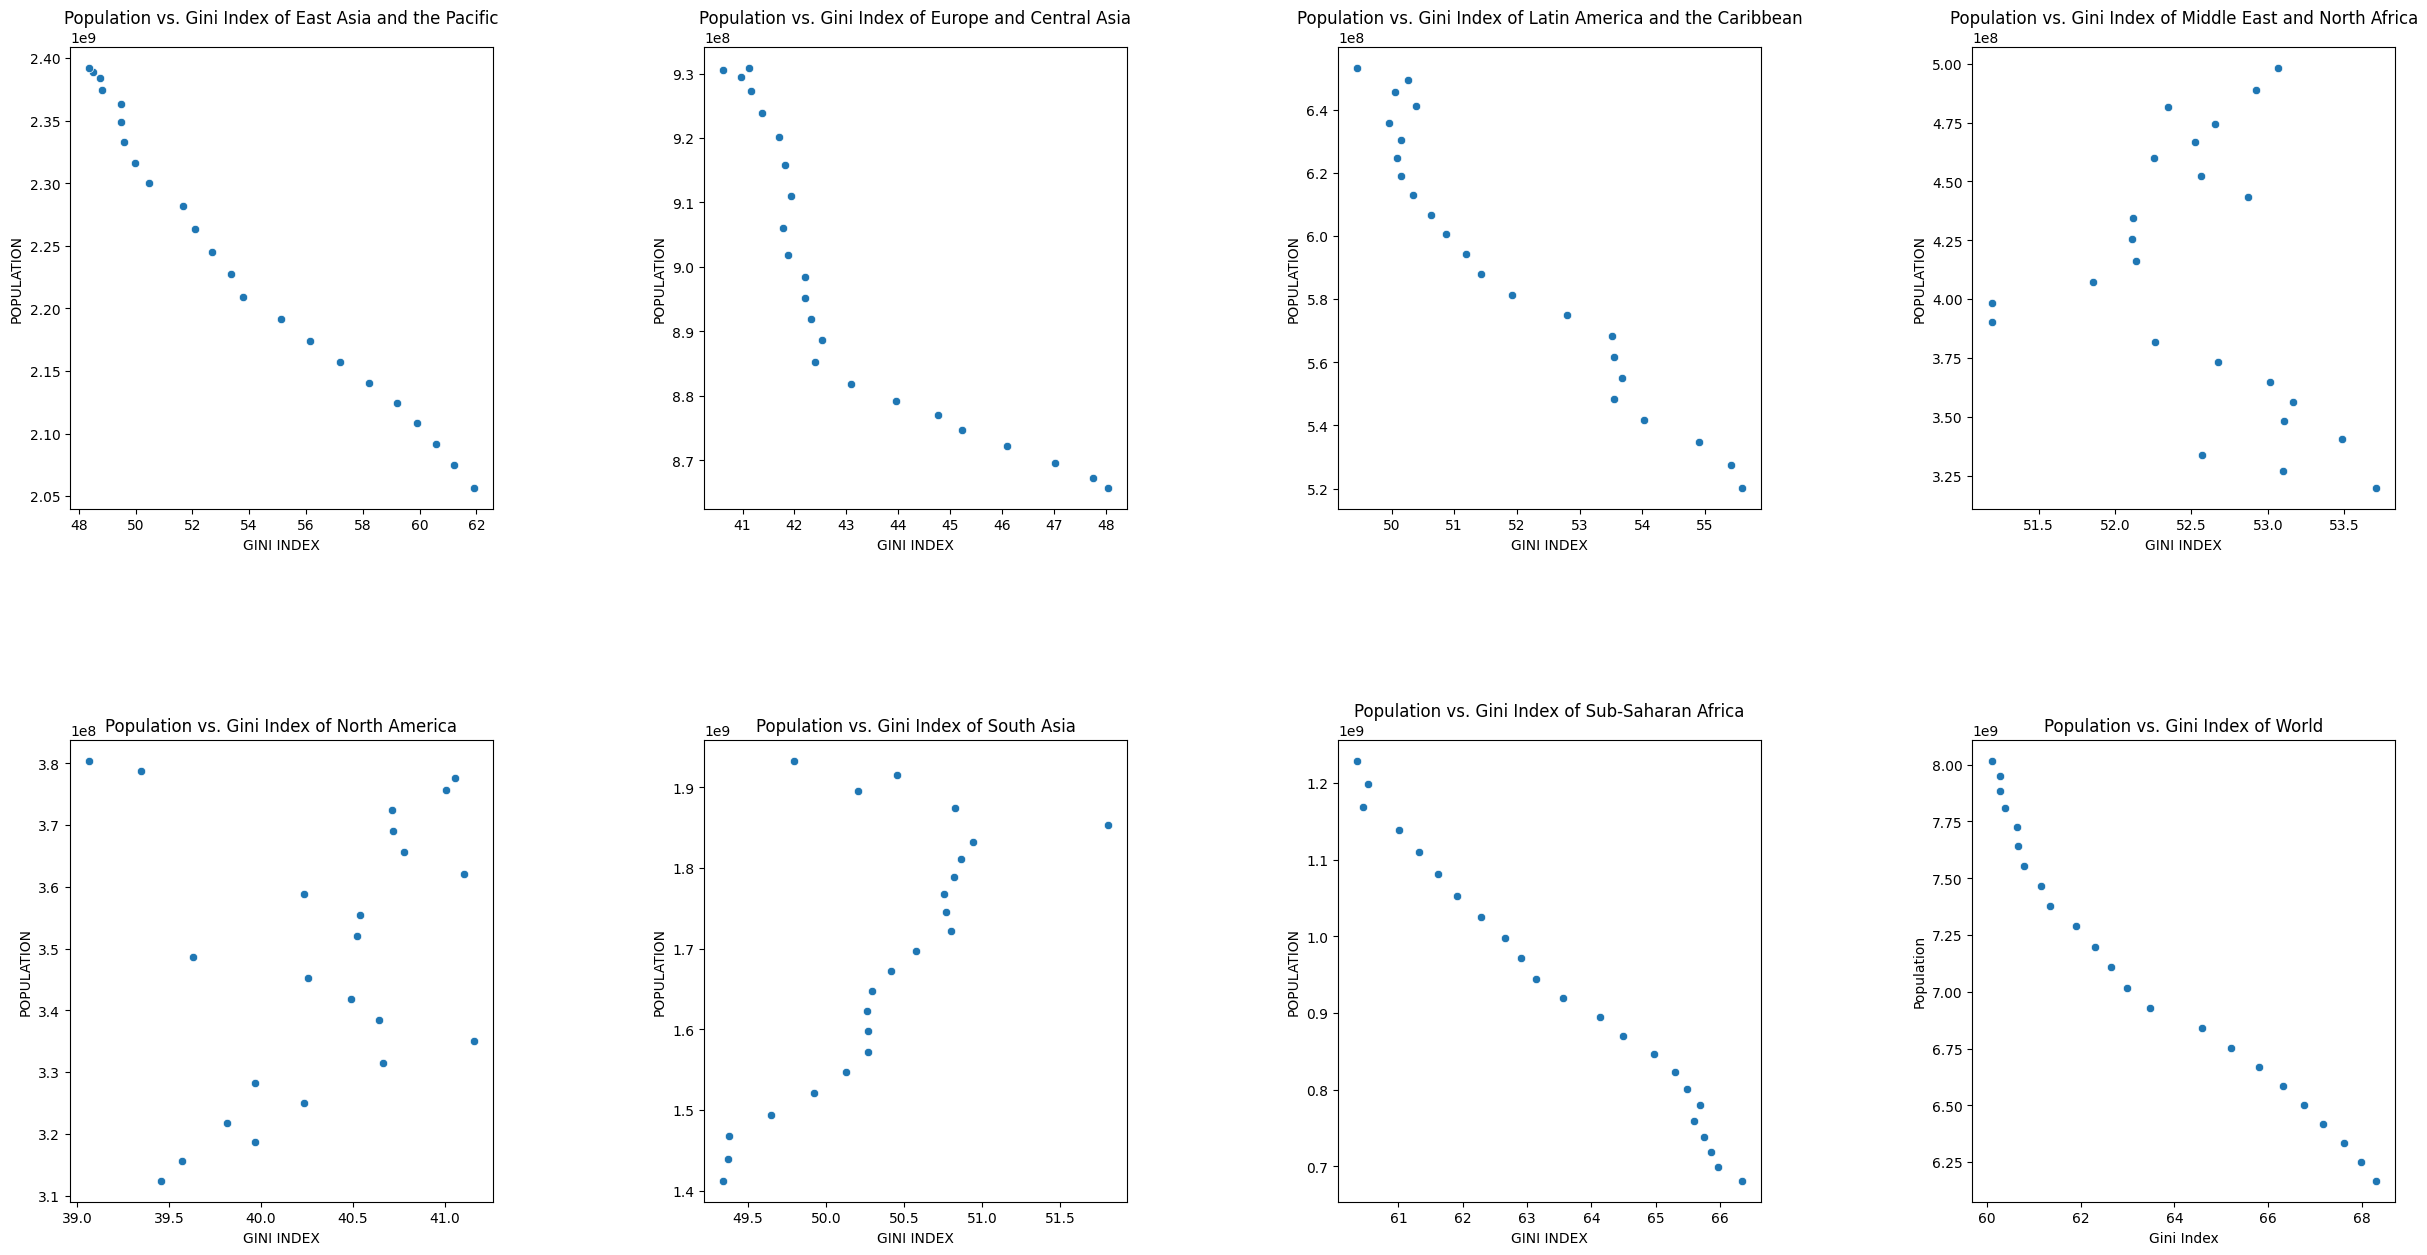

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.flatten()
index = 0

for key, value in regions_dict.items():
  sns.scatterplot(x = value.loc[:, 'GINI INDEX'], y = value.loc[:, 'POPULATION'], ax = ax[index])
  plt.xlabel('Gini Index')
  plt.ylabel('Population')
  ax[index].set_title(f'Population vs. Gini Index of {key}')
  index = index + 1

plt.show()

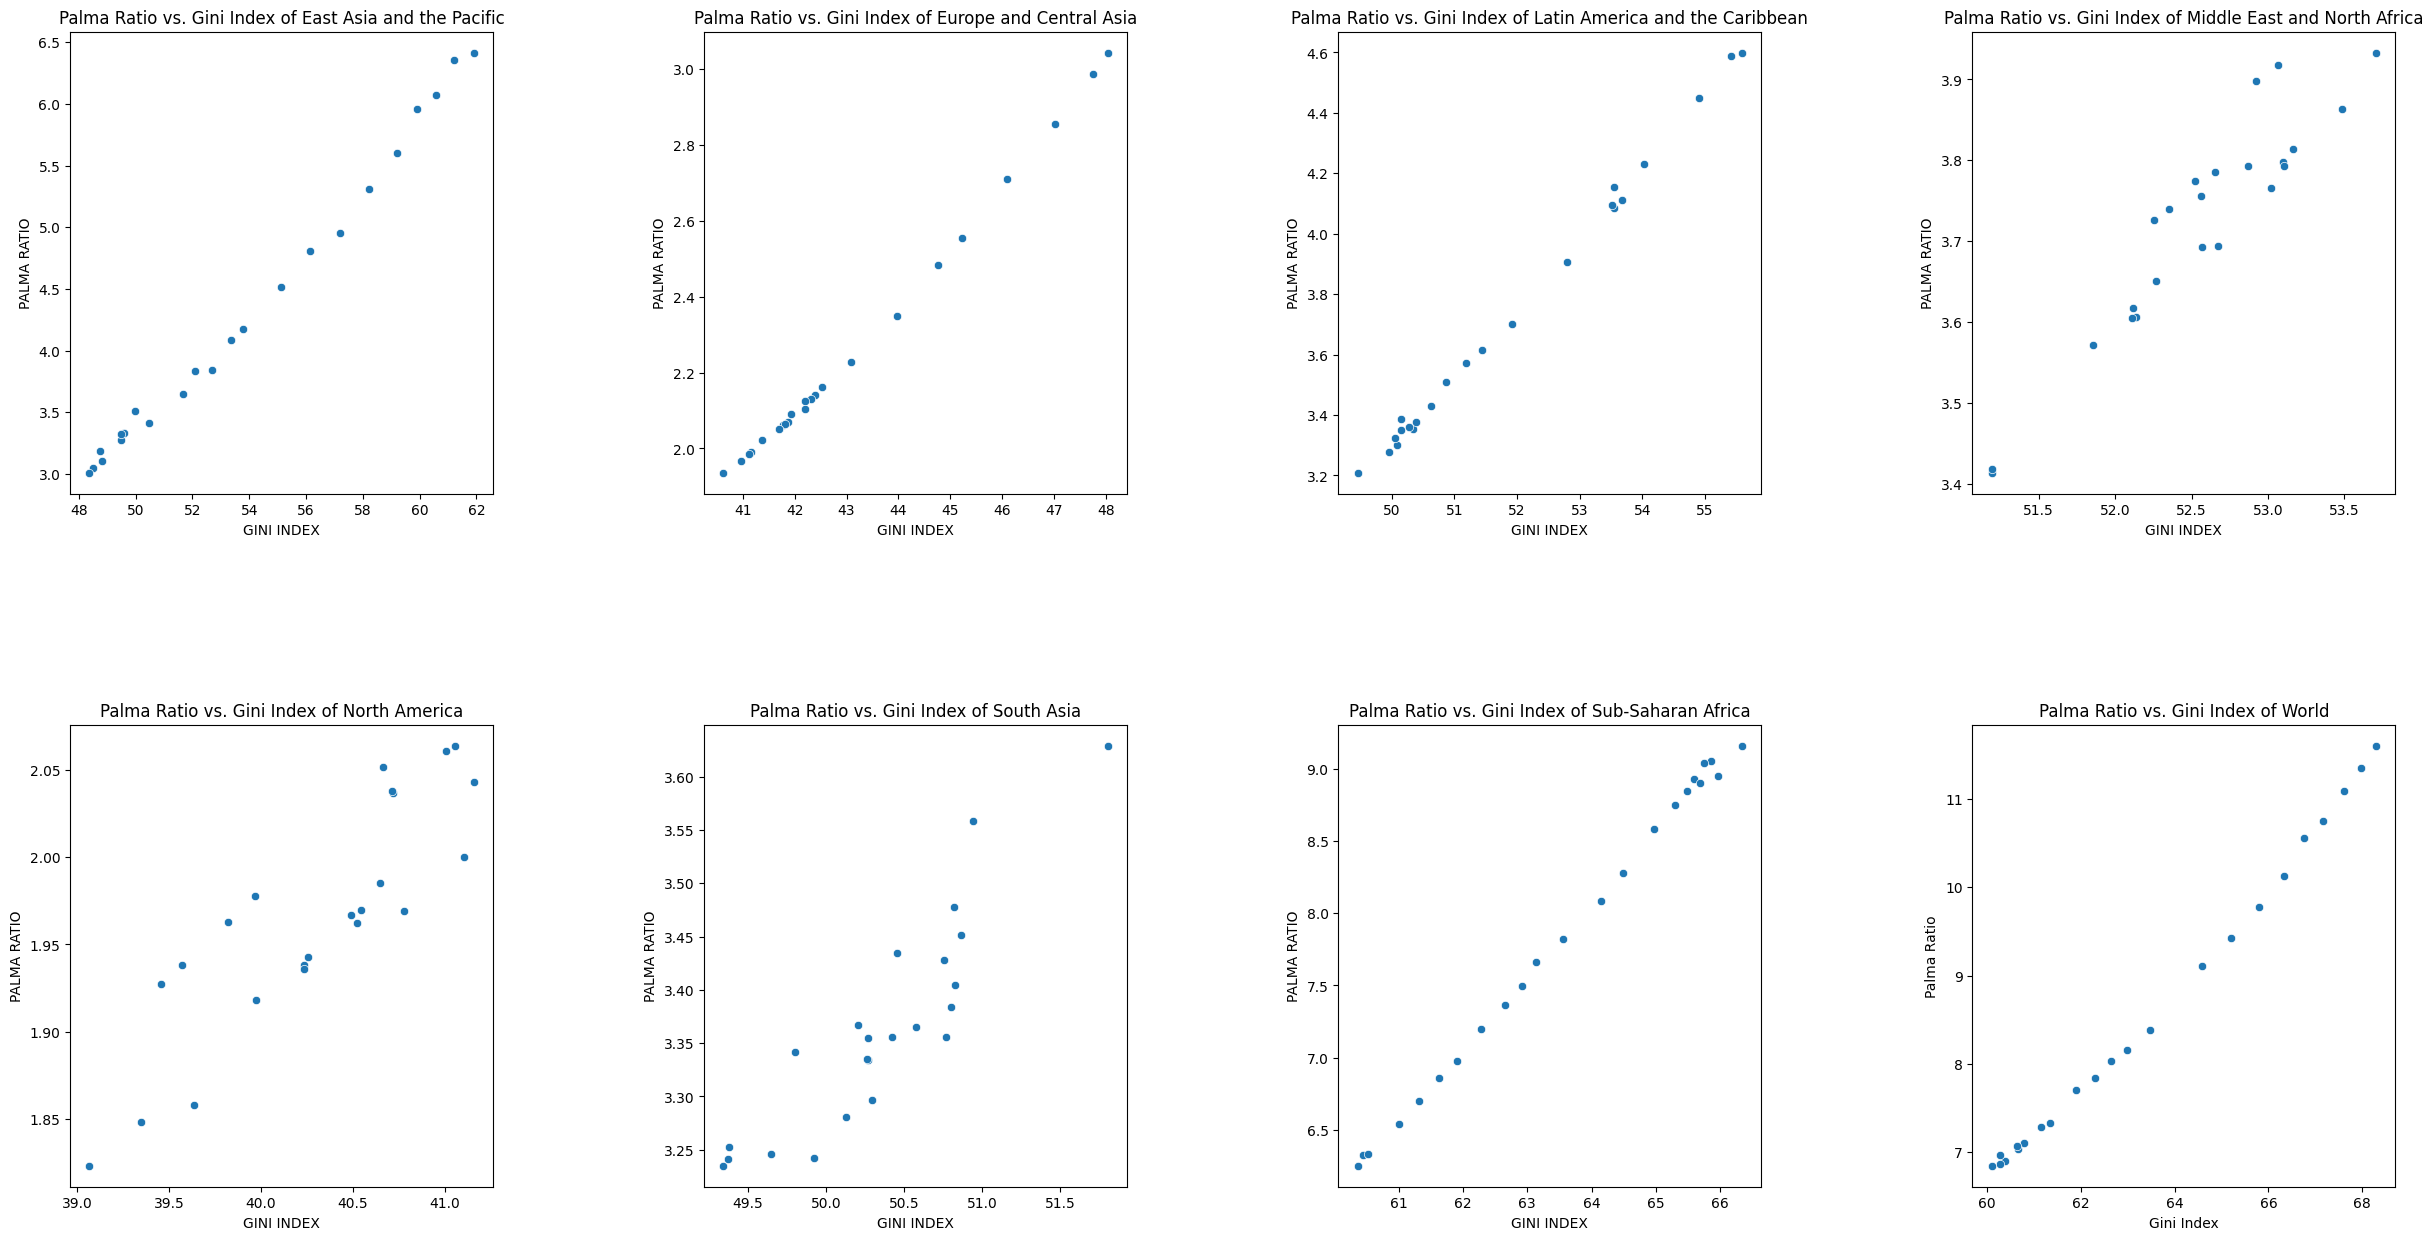

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.flatten()
index = 0

for key, value in regions_dict.items():
  sns.scatterplot(x = value.loc[:, 'GINI INDEX'], y = value.loc[:, 'PALMA RATIO'], ax = ax[index])
  plt.xlabel('Gini Index')
  plt.ylabel('Palma Ratio')
  ax[index].set_title(f'Palma Ratio vs. Gini Index of {key}')
  index = index + 1

plt.show()

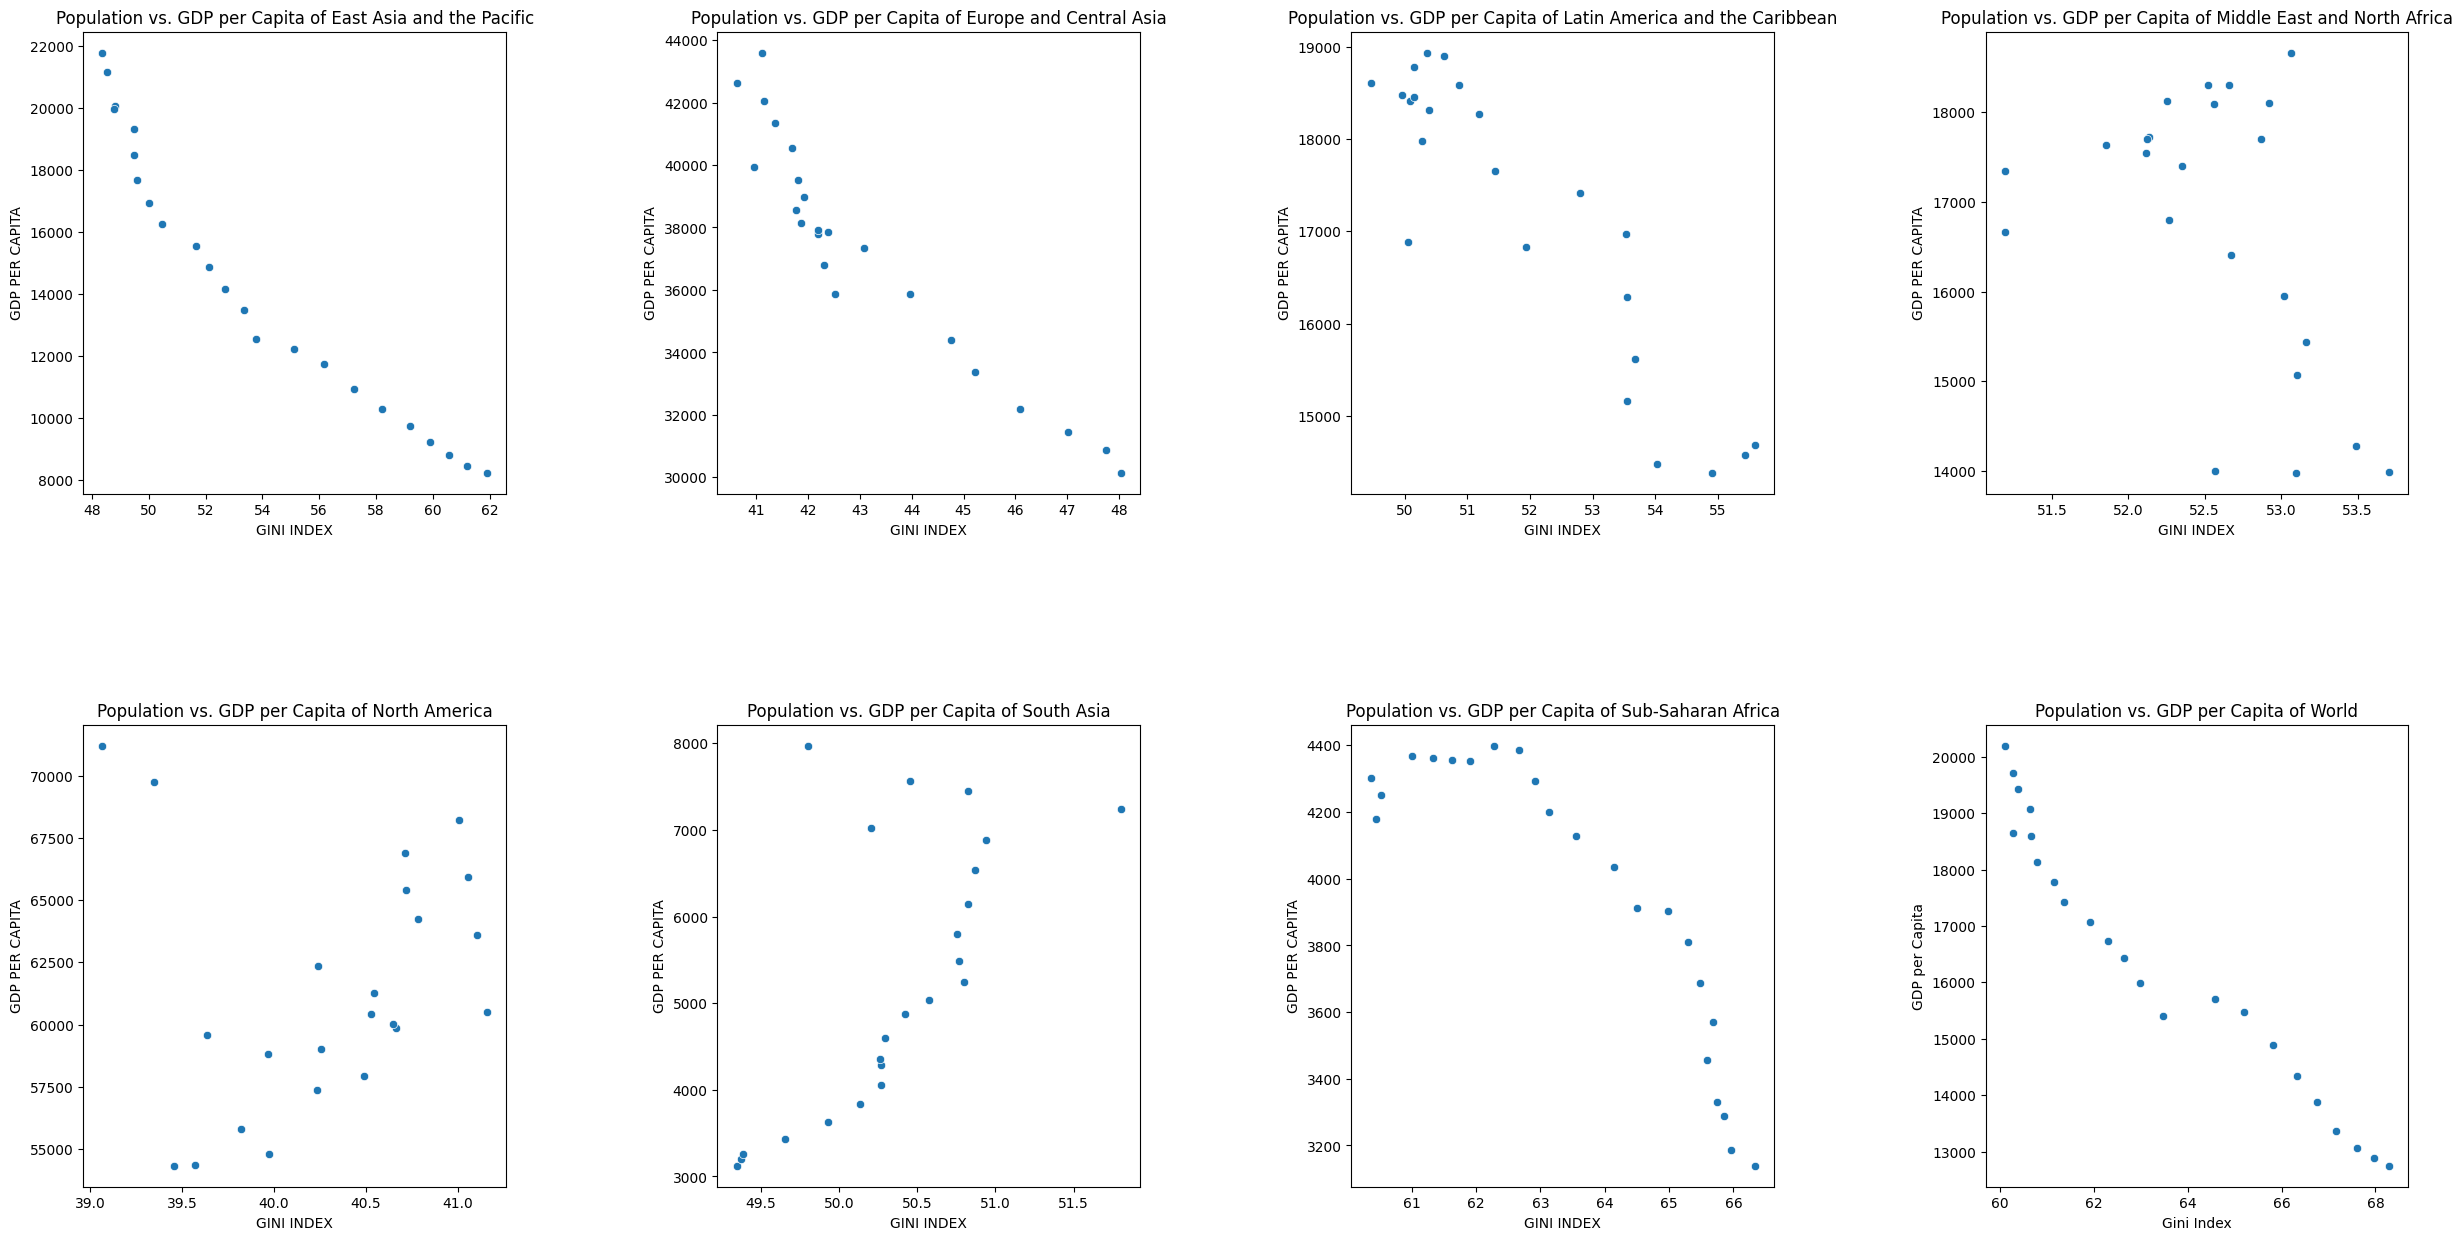

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.flatten()
index = 0

for key, value in regions_dict.items():
  sns.scatterplot(x = value.loc[:, 'GINI INDEX'], y = value.loc[:, 'GDP PER CAPITA'], ax = ax[index])
  plt.xlabel('Gini Index')
  plt.ylabel('GDP per Capita')
  ax[index].set_title(f'Population vs. GDP per Capita of {key}')
  index = index + 1

plt.show()

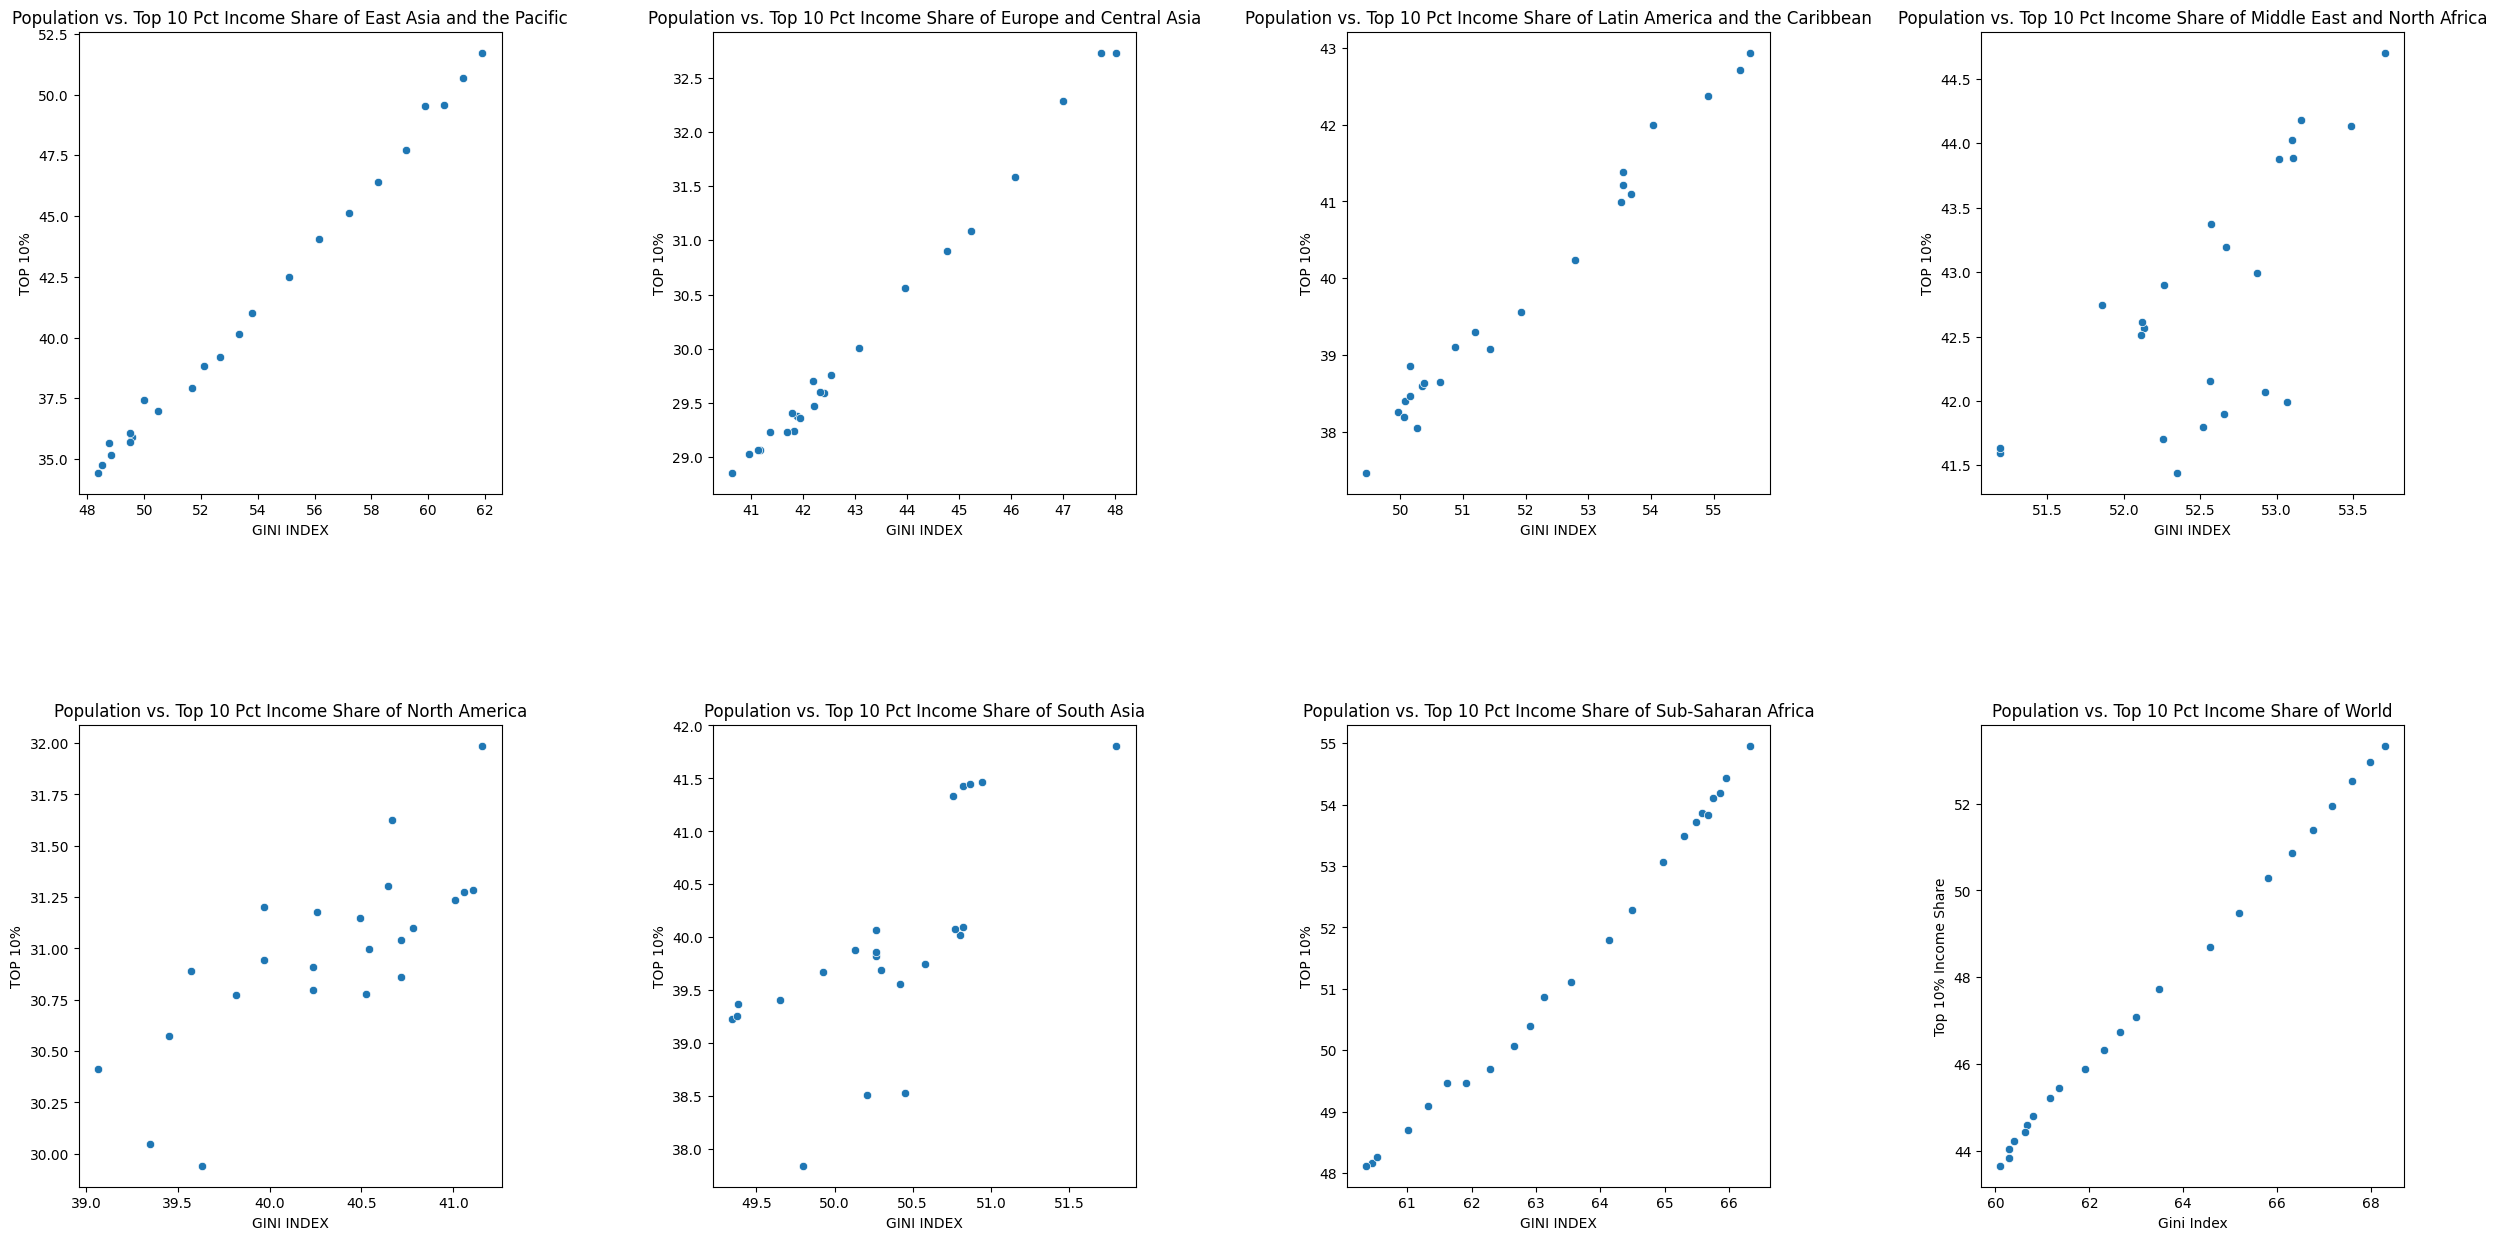

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.flatten()
index = 0

for key, value in regions_dict.items():
  sns.scatterplot(x = value.loc[:, 'GINI INDEX'], y = value.loc[:, 'TOP 10%'], ax = ax[index])
  plt.xlabel('Gini Index')
  plt.ylabel('Top 10% Income Share')
  ax[index].set_title(f'Population vs. Top 10 Pct Income Share of {key}')
  index = index + 1

plt.show()

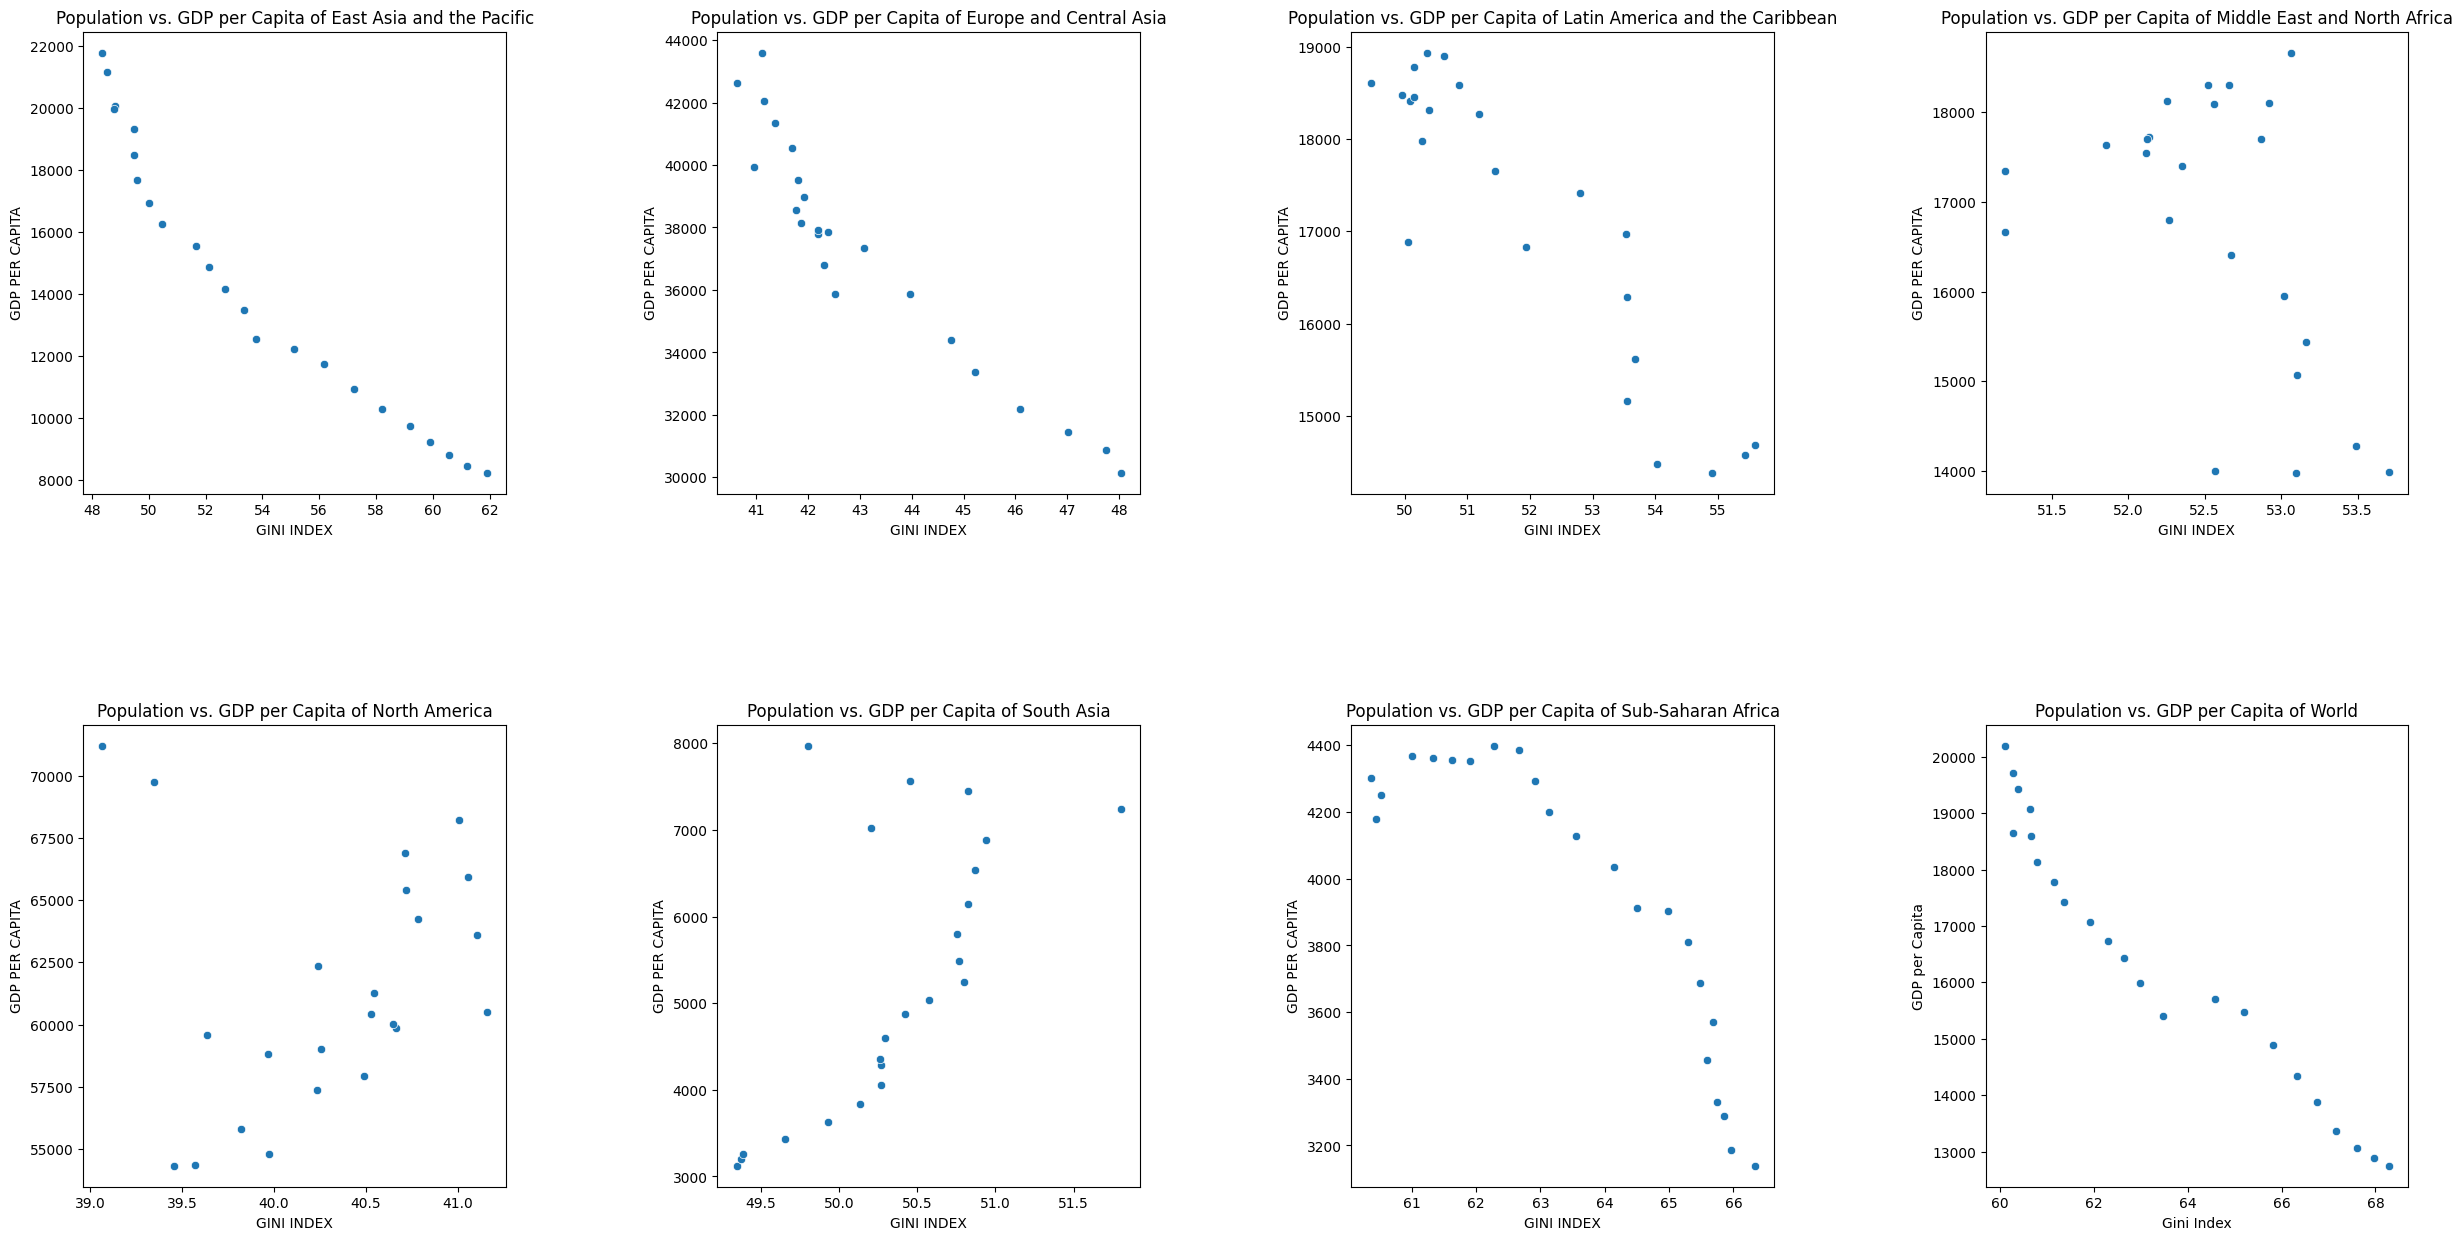

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.flatten()
index = 0

for key, value in regions_dict.items():
  sns.scatterplot(x = value.loc[:, 'GINI INDEX'], y = value.loc[:, 'GDP PER CAPITA'], ax = ax[index])
  plt.xlabel('Gini Index')
  plt.ylabel('GDP per Capita')
  ax[index].set_title(f'Population vs. GDP per Capita of {key}')
  index = index + 1

plt.show()

In [ ]:
df_region = df.iloc[-161:,:]

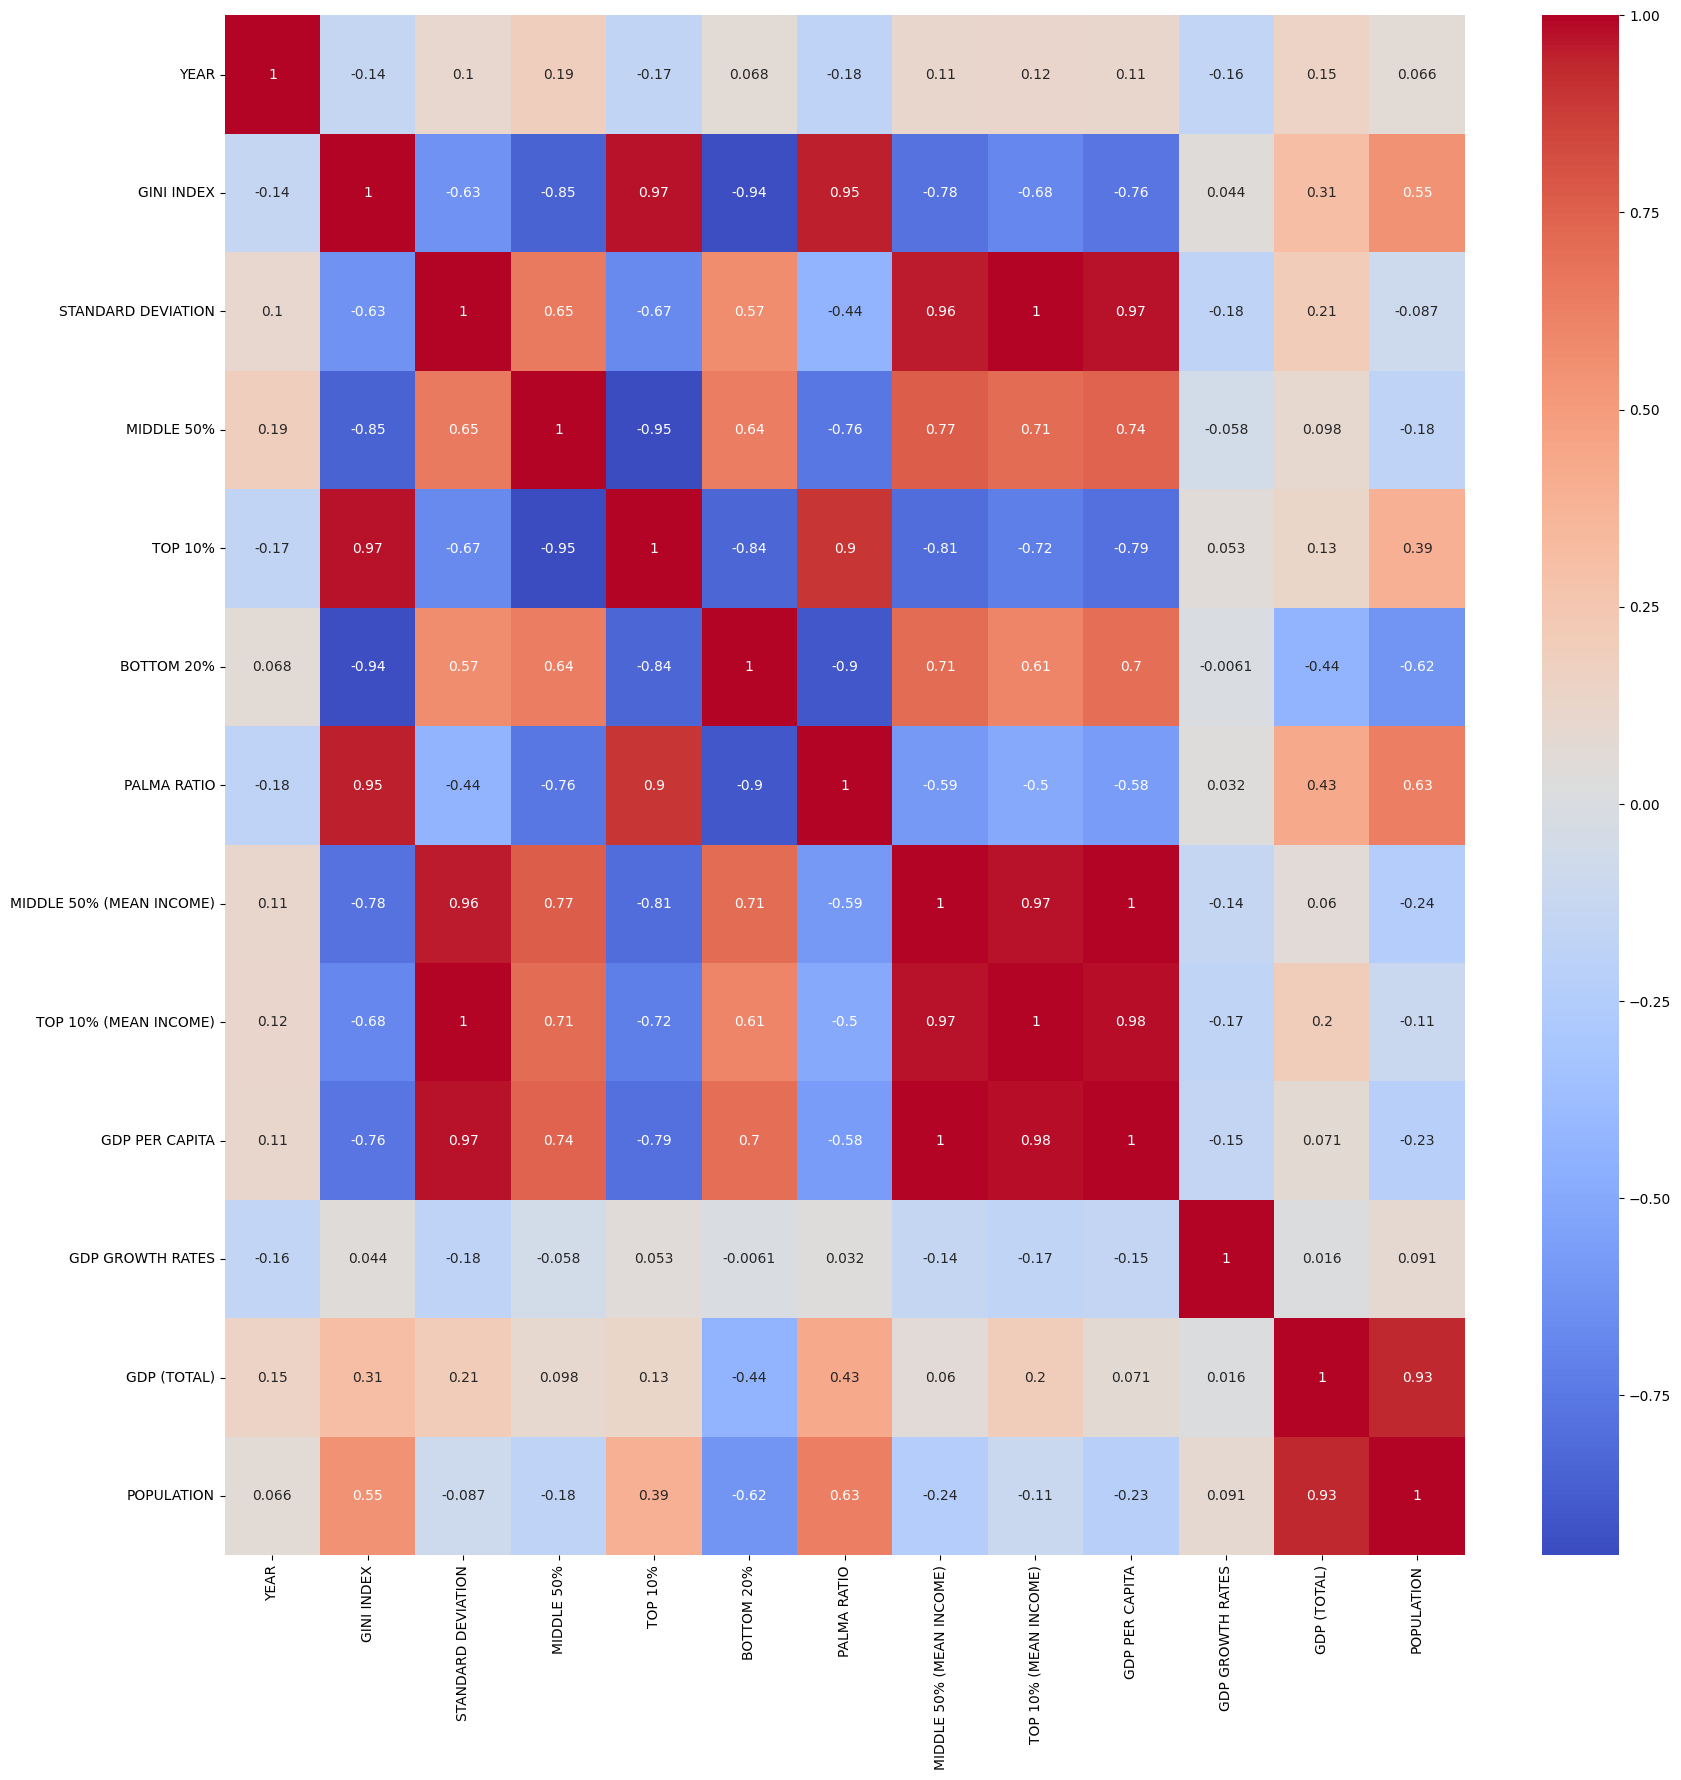

In [ ]:
plt.figure(figsize = (20, 20))
region_corr = df_region.corr(numeric_only = True)
sns.heatmap(region_corr, annot = True, cmap = 'coolwarm')
plt.show()

## Explaining Variation within Countries with Panel OLS (Fixed Effects Model)

In [ ]:
# Set up the data frame for the model.
df_ols = df.set_index(['COUNTRY', 'YEAR'])
df_ols.drop('ISO', axis = 1, inplace = True)

In [ ]:
df_ols.head()

GINI INDEX  STANDARD DEVIATION  MIDDLE 50%  TOP 10%  BOTTOM 20%  \
COUNTRY YEAR                                                                    
Aruba   2000      52.665             541.865      47.551   41.412       3.455   
        2001      52.668             555.371      47.858   41.205       3.396   
        2002      52.367             540.552      47.974   40.970       3.463   
        2003      51.968             532.190      48.216   40.580       3.530   
        2004      51.320             546.963      48.564   39.970       3.680   

              PALMA RATIO  MIDDLE 50% (MEAN INCOME)  TOP 10% (MEAN INCOME)  \
COUNTRY YEAR                                                                 
Aruba   2000        3.752                 37322.539             162519.281   
        2001        3.768                 38770.273             166904.641   
        2002        3.705                 38231.363             163247.375   
        2003        3.622                 38410.988             161640.422   
        2004        3.486                 40633.160             167214.875   

              GDP PER CAPITA  GDP GROWTH RATES   GDP (TOTAL)  POPULATION  
COUNTRY YEAR                                                              
Aruba   2000       39244.828             6.519  3.483410e+09     88761.0  
        2001       40505.531             3.212  3.657852e+09     90305.0  
        2002       39846.059            -1.628  3.641093e+09     91379.0  
        2003       39832.578            -0.034  3.676945e+09     92310.0  
        2004       41834.930             5.027  3.899559e+09     93213.0

In [ ]:
# Scale the data so the OLS model can interpret the predictors in terms of their relative importance.
scaler = StandardScaler()
cols_transform = ['STANDARD DEVIATION', 'MIDDLE 50%', 'TOP 10%', 'BOTTOM 20%', 'PALMA RATIO', 'MIDDLE 50% (MEAN INCOME)',	'TOP 10% (MEAN INCOME)',	'GDP PER CAPITA',	'GDP GROWTH RATES',	'POPULATION']
df_ols[cols_transform] = scaler.fit_transform(df_ols[cols_transform].values)


In [ ]:
df_ols.head()

GINI INDEX  STANDARD DEVIATION  MIDDLE 50%   TOP 10%  \
COUNTRY YEAR                                                         
Aruba   2000      52.665            1.808951   -0.639703  0.819954   
        2001      52.668            1.881092   -0.582535  0.796214   
        2002      52.367            1.801938   -0.560933  0.769261   
        2003      51.968            1.757273   -0.515869  0.724532   
        2004      51.320            1.836182   -0.451066  0.654571   

              BOTTOM 20%  PALMA RATIO  MIDDLE 50% (MEAN INCOME)  \
COUNTRY YEAR                                                      
Aruba   2000   -0.530750     0.224103                  0.458407   
        2001   -0.547554     0.228718                  0.511652   
        2002   -0.528472     0.210547                  0.491831   
        2003   -0.509390     0.186607                  0.498438   
        2004   -0.466669     0.147380                  0.580165   

              TOP 10% (MEAN INCOME)  GDP PER CAPITA  GDP GROWTH RATES  \
COUNTRY YEAR                                                            
Aruba   2000               1.413085        0.640272          0.801872   
        2001               1.479709        0.691334          0.210860   
        2002               1.424147        0.664623         -0.654122   
        2003               1.399733        0.664077         -0.369250   
        2004               1.484422        0.745177          0.535229   

               GDP (TOTAL)  POPULATION  
COUNTRY YEAR                            
Aruba   2000  3.483410e+09   -0.181457  
        2001  3.657852e+09   -0.181454  
        2002  3.641093e+09   -0.181452  
        2003  3.676945e+09   -0.181450  
        2004  3.899559e+09   -0.181449

In [ ]:
model = PanelOLS.from_formula(
    'Q("GINI INDEX") ~ Q("GDP PER CAPITA") + Q("PALMA RATIO") + Q("TOP 10%") + POPULATION + EntityEffects + TimeEffects',
    data= df_ols
)

results = model.fit()
print(results)


                          PanelOLS Estimation Summary                           
Dep. Variable:        Q('GINI INDEX')   R-squared:                        0.7821
Estimator:                   PanelOLS   R-squared (Between):              0.0500
No. Observations:                5037   R-squared (Within):               0.8159
Date:                Thu, Dec 04 2025   R-squared (Overall):              0.0518
Time:                        00:15:23   Log-likelihood                   -6835.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4300.7
Entities:                         219   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(4,4792)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             4300.7
                            

### Since we're using a Fixed Effects model, we're focusing on the variation of Gini Indices within each country, rather than between countries.

### The model achieved an R^2 of 0.8161, which is great.

### We're not specifically focusing on the overall R^2 or the R^2 for variation between countries.

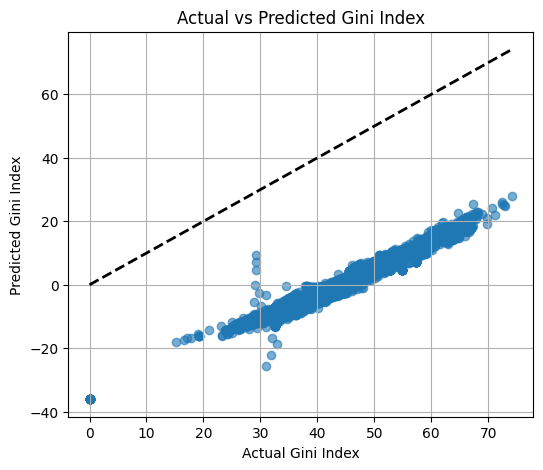

In [ ]:
  plt.figure(figsize=(6, 5))
  plt.scatter(df_ols['GINI INDEX'], results.predict().values, alpha=0.6)
  plt.plot([df_ols['GINI INDEX'].min(), df_ols['GINI INDEX'].max()], [df_ols['GINI INDEX'].min(), df_ols['GINI INDEX'].max()], 'k--', lw=2) # Identity line
  plt.xlabel('Actual Gini Index')
  plt.ylabel('Predicted Gini Index')
  plt.title('Actual vs Predicted Gini Index')
  plt.grid(True)
  plt.show()


In [ ]:
df_ols['PREDICTIONS'] = results.predict().values

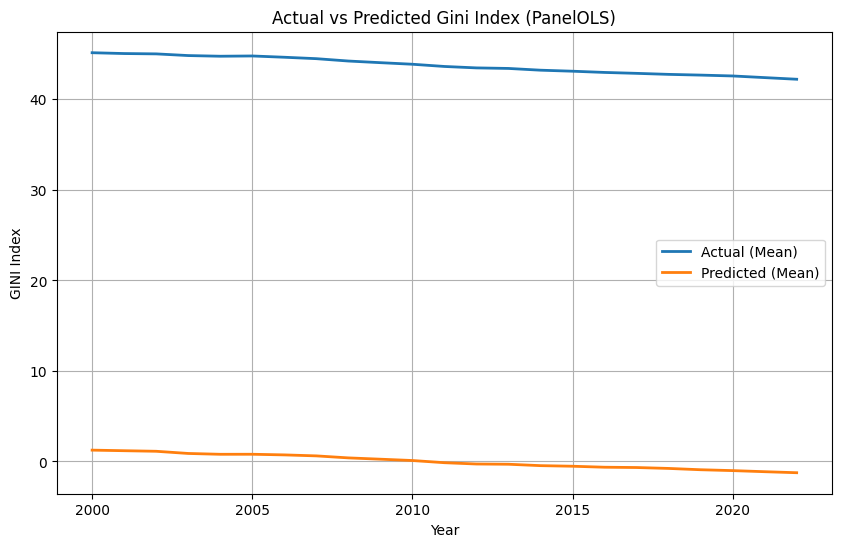

In [ ]:
df_plot = df_ols.reset_index().groupby("YEAR")[["GINI INDEX", "PREDICTIONS"]].mean()

plt.figure(figsize=(10,6))
plt.plot(df_plot.index, df_plot["GINI INDEX"], label="Actual (Mean)", linewidth=2)
plt.plot(df_plot.index, df_plot["PREDICTIONS"], label="Predicted (Mean)", linewidth=2)
plt.title("Actual vs Predicted Gini Index (PanelOLS)")
plt.xlabel("Year")
plt.ylabel("GINI Index")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_ols['RESIDUALS'] = df_ols['GINI INDEX'] - df_ols['PREDICTIONS']

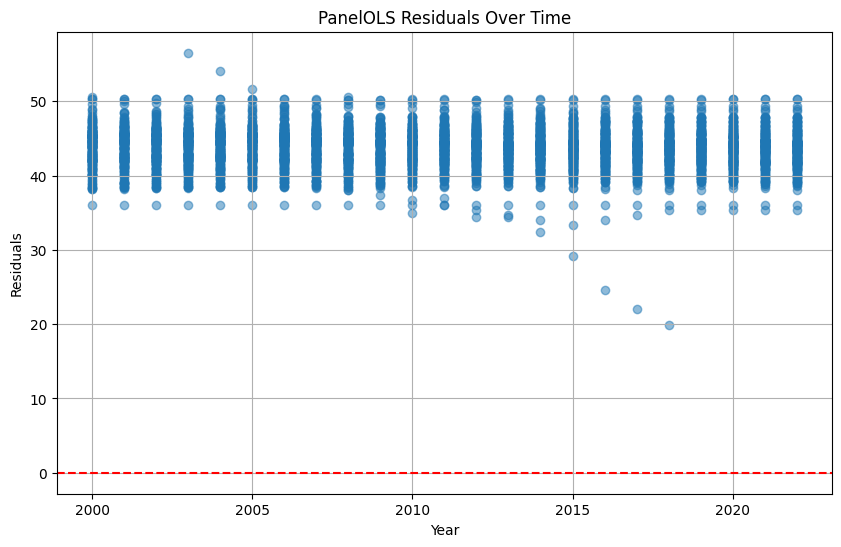

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_ols.reset_index()["YEAR"], df_ols["RESIDUALS"], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("PanelOLS Residuals Over Time")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


####RANDOM FOREST with LAG FEATURES

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------
# 1. PREPARE DATA
# -------------------------------

region = "region_wb-east_asia_and_the_pacific"
df_rf = df[df["ISO"] == region].copy()

cols = ["YEAR", "GINI INDEX", "GDP PER CAPITA", "PALMA RATIO", "TOP 10%", "POPULATION"]
df_rf = df_rf[cols].dropna().sort_values("YEAR")

# Create lag features (t-1)
df_rf["GINI_lag1"] = df_rf["GINI INDEX"].shift(1)
df_rf["GDP_lag1"] = df_rf["GDP PER CAPITA"].shift(1)
df_rf["PALMA_lag1"] = df_rf["PALMA RATIO"].shift(1)
df_rf["TOP10_lag1"] = df_rf["TOP 10%"].shift(1)
df_rf["POP_lag1"] = df_rf["POPULATION"].shift(1)

df_rf = df_rf.dropna().reset_index(drop=True)

# Feature matrix and target
features = [
    "GINI_lag1", "GDP_lag1", "PALMA_lag1", "TOP10_lag1", "POP_lag1"
]
target = "GINI INDEX"

X = df_rf[features]
y = df_rf[target]

# -------------------------------
# 2. TRAIN / TEST SPLIT (TIME-SERIES)
# -------------------------------
train_size = int(0.8 * len(df_rf))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# -------------------------------
# 3. TRAIN RANDOM FOREST
# -------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

# -------------------------------
# 4. ACCURACY ON TEST SET
# -------------------------------
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest with Lag Features — Accuracy:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

# -------------------------------
# 5. FORECAST 2023–2026 RECURSIVELY
# -------------------------------
last_row = df_rf.iloc[-1].copy()

future_years = [2023, 2024, 2025, 2026]
future_preds = []

for year in future_years:

    # Input features for prediction
    x_future = pd.DataFrame([[
        last_row["GINI INDEX"],
        last_row["GDP PER CAPITA"],
        last_row["PALMA RATIO"],
        last_row["TOP 10%"],
        last_row["POPULATION"]
    ]], columns=["GINI_lag1","GDP_lag1","PALMA_lag1","TOP10_lag1","POP_lag1"])

    pred_gini = rf.predict(x_future)[0]

    # Save predictions
    future_preds.append([year, pred_gini])

    # Update last_row so next prediction uses this year's forecast
    last_row["GINI INDEX"] = pred_gini

# -------------------------------
# 6. OUTPUT FINAL FORECAST
# -------------------------------
forecast_df = pd.DataFrame(future_preds, columns=["YEAR", "PREDICTED_GINI"])
print("\nForecasted GINI 2023–2026:")
print(forecast_df)


Random Forest with Lag Features — Accuracy:
RMSE: 0.9437
MAE:  0.8619
R²:   -5.0290

Forecasted GINI 2023–2026:
   YEAR  PREDICTED_GINI
0  2023       49.650852
1  2024       49.650852
2  2025       49.650852
3  2026       49.650852


In [ ]:
preds = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Random Forest Regression Accuracy:")
print("  RMSE:", rmse)
print("  MAE :", mae)
print("  R²  :", r2)


Random Forest Regression Accuracy:
  RMSE: 0.943658449813202
  MAE : 0.8618519999999166
  R²  : -5.028955994647749


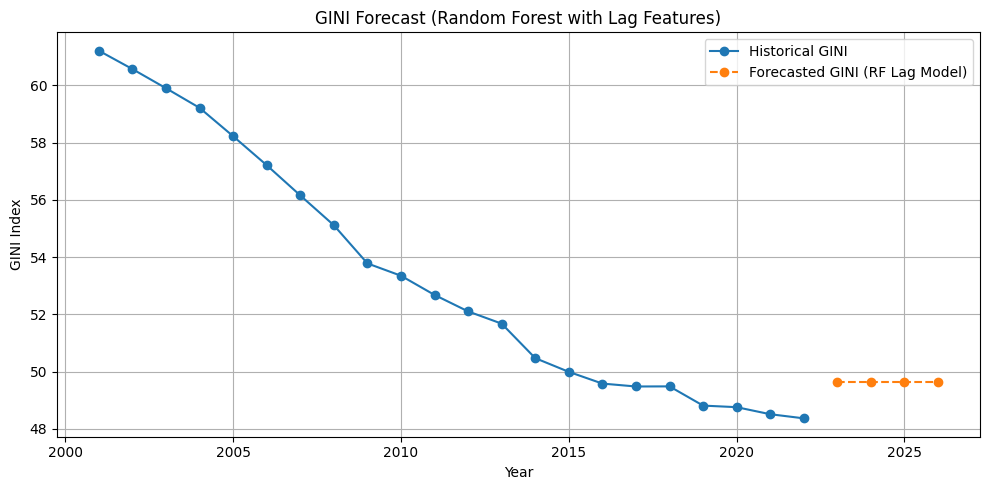

In [ ]:
import matplotlib.pyplot as plt


hist_years = df_rf["YEAR"]
hist_gini = df_rf["GINI INDEX"]


future_years = forecast_df["YEAR"]
future_gini = forecast_df["PREDICTED_GINI"]


plt.figure(figsize=(10, 5))

# Historical line
plt.plot(hist_years, hist_gini, marker='o', label="Historical GINI")

# Forecast line
plt.plot(future_years, future_gini, marker='o', linestyle="--", label="Forecasted GINI (RF Lag Model)")

plt.title("GINI Forecast (Random Forest with Lag Features)")
plt.xlabel("Year")
plt.ylabel("GINI Index")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


####VAR

In [ ]:

from statsmodels.tsa.api import VAR


region = "region_wb-east_asia_and_the_pacific"
df_var = df[df["ISO"] == region].copy()

cols = ["YEAR", "GINI INDEX", "GDP PER CAPITA", "PALMA RATIO", "TOP 10%", "POPULATION"]
df_var = df_var[cols].dropna()
df_var.sort_values("YEAR", inplace=True)
df_var.reset_index(drop=True, inplace=True)

# Features (X) and target (y)
X = df_var[["YEAR", "GDP PER CAPITA", "PALMA RATIO", "TOP 10%", "POPULATION"]]
y = df_var["GINI INDEX"]

# set year as index for time-series clarity
df_ts = df_var.set_index("YEAR")

print(df_ts.head())

# ------------------------------------
# 2. FIT VAR MODEL
# ------------------------------------
# VAR cannot run with only one row of data; need > lag size
model = VAR(df_ts)

# choose best lag based on AIC
lags = model.select_order(maxlags=1)
best_lag = lags.aic
print("Best lag by AIC:", best_lag)

var_model = model.fit(best_lag)
print(var_model.summary())

# ------------------------------------
# 3. FORECAST 2023–2026
# ------------------------------------
start_year = df_ts.index.max() + 1
end_year = 2026
steps = end_year - df_ts.index.max()

forecast_values = var_model.forecast(df_ts.values[-best_lag:], steps=steps)

# ------------------------------------
# 4. FORMAT FORECAST OUTPUT
# ------------------------------------
forecast_df = pd.DataFrame(
    forecast_values,
    index=range(start_year, end_year + 1),
    columns=df_ts.columns
)

# keep only GINI forecast
gini_forecast = forecast_df[["GINI INDEX"]].reset_index().rename(columns={"index": "YEAR"})

print("\nPredicted GINI (2023–2026):\n")
print(gini_forecast)


      GINI INDEX  GDP PER CAPITA  PALMA RATIO  TOP 10%    POPULATION
YEAR                                                                
2000      61.902         8219.41        6.416   51.720  2.056665e+09
2001      61.206         8446.54        6.354   50.666  2.074901e+09
2002      60.565         8793.95        6.077   49.588  2.091868e+09
2003      59.896         9211.51        5.959   49.548  2.108103e+09
2004      59.211         9728.21        5.601   47.716  2.124050e+09
Best lag by AIC: 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Dec, 2025
Time:                     00:15:27
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    30.3021
Nobs:                     22.0000    HQIC:                   29.1648
Log likelihood:          -443.041    FPE:                3.50483e+12
AIC:                      28.8144    Det(Omega_

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# ------------------------------------
# ACCURACY: TRAIN/TEST SPLIT FOR VAR
# ------------------------------------

# Use last 2 observations as test set (VAR needs enough data)
test_size = 2
train = df_ts.iloc[:-test_size]
test = df_ts.iloc[-test_size:]

# Refit model on train only
model_train = VAR(train)
var_train = model_train.fit(best_lag)

# Forecast exactly test_size steps
pred = var_train.forecast(train.values[-best_lag:], steps=test_size)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(pred, index=test.index, columns=test.columns)

# Compute accuracy for GINI only
y_true = test["GINI INDEX"].values
y_pred = pred_df["GINI INDEX"].values

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nVAR Accuracy on GINI INDEX:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}\n")

# (Optional) accuracy for all variables
all_rmse = np.sqrt(mean_squared_error(test.values, pred_df.values))
all_mae = mean_absolute_error(test.values, pred_df.values)

print("Overall VAR Accuracy (all variables):")
print(f"RMSE: {all_rmse:.4f}")
print(f"MAE:  {all_mae:.4f}")



VAR Accuracy on GINI INDEX:
RMSE: 0.1808
MAE:  0.1557
R²:   -5.3034

Overall VAR Accuracy (all variables):
RMSE: 3935567.2327
MAE:  1642501.4723


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


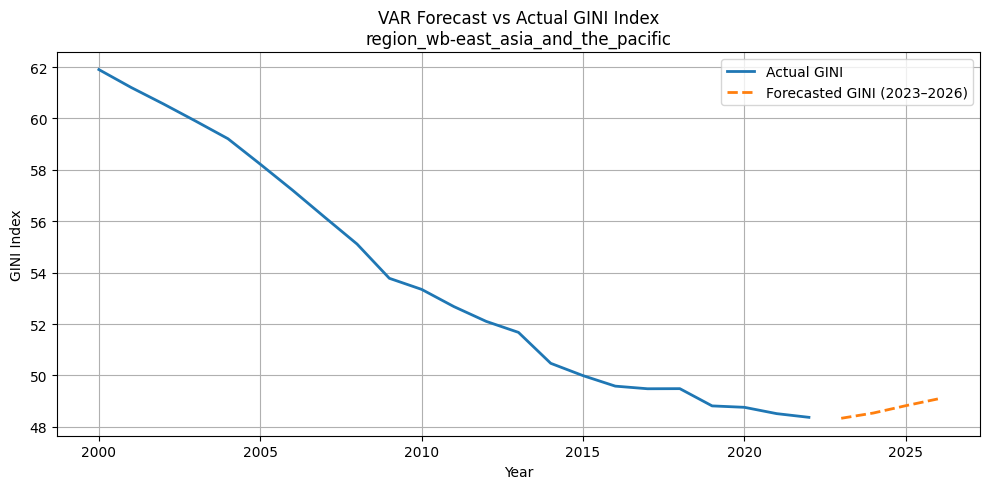

In [ ]:
import matplotlib.pyplot as plt

# -----------------------------
# 5. PLOT ACTUAL vs FORECAST
# -----------------------------
plt.figure(figsize=(10, 5))

# Actual values
plt.plot(df_ts.index, df_ts["GINI INDEX"], label="Actual GINI", linewidth=2)

# Forecast values
plt.plot(gini_forecast["YEAR"], gini_forecast["GINI INDEX"],
         label="Forecasted GINI (2023–2026)", linestyle="--", linewidth=2)

plt.title(f"VAR Forecast vs Actual GINI Index\n{region}")
plt.xlabel("Year")
plt.ylabel("GINI Index")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##LSTM for Selected Regions
Output is flat


Regions found: ['region_wb-east_asia_and_the_pacific', 'region_wb-europe_and_central_asia', 'region_wb-latin_america_and_the_caribbean', 'region_wb-middle_east_and_north_africa', 'region_wb-north_america', 'region_wb-south_asia', 'region_wb-sub_saharan_africa', 'world-world']

Processing region: region_wb-east_asia_and_the_pacific


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


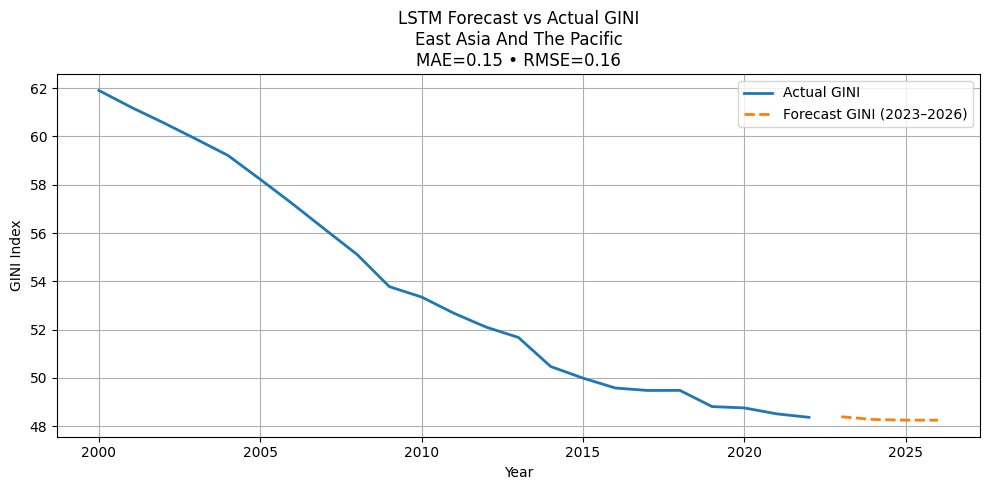


Processing region: region_wb-europe_and_central_asia


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


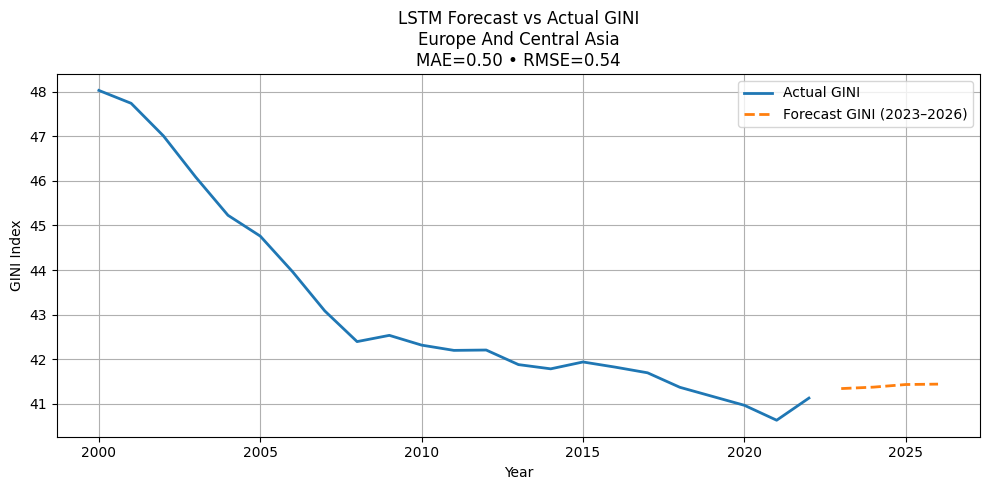


Processing region: region_wb-latin_america_and_the_caribbean


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# -----------------------------
# 0. GET UNIQUE REGIONS
# -----------------------------
regions =['region_wb-east_asia_and_the_pacific', 'region_wb-europe_and_central_asia', 'region_wb-latin_america_and_the_caribbean', 'region_wb-middle_east_and_north_africa', 'region_wb-north_america', 'region_wb-south_asia', 'region_wb-sub_saharan_africa', 'world-world']

print("Regions found:", regions)

all_forecasts = []      # store forecasts
accuracy_results = []   # store accuracy values per region


# =====================================================================
# LOOP THROUGH EVERY REGION
# =====================================================================
for region in regions:

    print("\n==============================")
    print("Processing region:", region)
    print("==============================")

    # --------------------------------------
    # 1. FILTER DATA FOR REGION
    # --------------------------------------
    df_lstm = df[df["ISO"] == region].copy()

    cols = ["YEAR", "GINI INDEX", "GDP PER CAPITA", "PALMA RATIO", "GDP (TOTAL)",
            "TOP 10%", "POPULATION"]
    df_lstm = df_lstm[cols].dropna()

    # minimum for LSTM: 7 rows
    if len(df_lstm) < 7:
        print("⚠️ Not enough data — skipping region:", region)
        continue

    df_lstm.sort_values("YEAR", inplace=True)
    df_lstm.reset_index(drop=True, inplace=True)

    # --------------------------------------
    # 2. SCALE FEATURES
    # --------------------------------------
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_lstm.drop(columns=["YEAR"]))

    years = df_lstm["YEAR"].values

    # --------------------------------------
    # 3. CREATE SEQUENCES
    # --------------------------------------
    def create_sequences(data, seq_len=3):
        X, y = [], []
        for i in range(len(data) - seq_len):
            X.append(data[i:i+seq_len])
            y.append(data[i+seq_len][0])  # GINI is column 0
        return np.array(X), np.array(y)

    SEQ_LEN = 3
    X, y = create_sequences(scaled, SEQ_LEN)

    # --------------------------------------
    # 4. TRAIN/TEST SPLIT
    # --------------------------------------
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # --------------------------------------
    # 5. BUILD LSTM MODEL
    # --------------------------------------
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=(SEQ_LEN, X.shape[2])),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")

    model.fit(X_train, y_train, epochs=80, batch_size=4, verbose=0)

    # --------------------------------------
    # 6. MODEL ACCURACY (TEST SET)
    # --------------------------------------
    y_pred_scaled = model.predict(X_test, verbose=0).flatten()

    # inverse-transform actual
    dummy_actual = np.zeros((len(y_test), scaled.shape[1]))
    dummy_actual[:, 0] = y_test
    y_actual = scaler.inverse_transform(dummy_actual)[:, 0]

    # inverse-transform predicted
    dummy_pred = np.zeros((len(y_pred_scaled), scaled.shape[1]))
    dummy_pred[:, 0] = y_pred_scaled
    y_predicted = scaler.inverse_transform(dummy_pred)[:, 0]

    # compute metrics
    mae = mean_absolute_error(y_actual, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))

    # store accuracy result
    accuracy_results.append({
        "ISO": region,
        "MAE": mae,
        "RMSE": rmse
    })

    # --------------------------------------
    # 7. MULTI-STEP FORECAST (2023–2026)
    # --------------------------------------
    future_years = [2023, 2024, 2025, 2026]

    window = scaled[-SEQ_LEN:].copy()
    forecast_scaled = []

    for _ in future_years:
        pred = model.predict(window.reshape(1, SEQ_LEN, -1), verbose=0)[0][0]

        new_row = window[-1].copy()
        new_row[0] = pred
        window = np.vstack([window[1:], new_row])

        forecast_scaled.append(pred)

    dummy = np.zeros((len(forecast_scaled), scaled.shape[1]))
    dummy[:, 0] = forecast_scaled
    forecast_gini = scaler.inverse_transform(dummy)[:, 0]

    # save forecast
    all_forecasts.append(pd.DataFrame({
        "ISO": region,
        "YEAR": future_years,
        "FORECAST_GINI": forecast_gini
    }))

    # --------------------------------------
    # 8. PLOT ACTUAL VS FORECAST
    # --------------------------------------
    plt.figure(figsize=(10, 5))

    plt.plot(df_lstm["YEAR"], df_lstm["GINI INDEX"],
             label="Actual GINI", linewidth=2)

    plt.plot(future_years, forecast_gini,
             label="Forecast GINI (2023–2026)",
             linestyle="--", linewidth=2)

    region_name = region.replace("region_wb-", "").replace("_", " ").title()

    plt.title(f"LSTM Forecast vs Actual GINI\n{region_name}\nMAE={mae:.2f} • RMSE={rmse:.2f}")
    plt.xlabel("Year")
    plt.ylabel("GINI Index")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()


# =====================================================================
# FINAL OUTPUT TABLES
# =====================================================================

forecast_results = pd.concat(all_forecasts, ignore_index=True)
accuracy_df = pd.DataFrame(accuracy_results)

print("\n\n======================")
print("📌 FINAL FORECAST RESULTS")
print("======================")
print(forecast_results)

print("\n======================")
print("📊 ACCURACY PER REGION (MAE & RMSE)")
print("======================")
print(accuracy_df)


##VAR Model for Selected Regions

In [ ]:
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ==========================================
# VAR FORECASTING FOR ALL REGIONS (2023–2026)
# ==========================================

forecast_list = []
accuracy_list = []

regions = [
    'region_wb-east_asia_and_the_pacific',
    'region_wb-europe_and_central_asia',
    'region_wb-latin_america_and_the_caribbean',
    'region_wb-middle_east_and_north_africa',
    'region_wb-north_america',
    'region_wb-south_asia',
    'region_wb-sub_saharan_africa',
    'world-world'
]

future_years = [2023, 2024, 2025, 2026]

for region in regions:

    df_region = df[df["ISO"] == region].copy()
    cols = ["YEAR", "GINI INDEX", "GDP PER CAPITA", "GDP (TOTAL)", "PALMA RATIO", "TOP 10%", "POPULATION"]
    df_region = df_region[cols].dropna()

    # Need minimum data
    if len(df_region) < 5:
        continue

    df_region = df_region.sort_values("YEAR").set_index("YEAR")

    # -------------------------------
    # 1. Train/Test split
    # -------------------------------
    train = df_region.iloc[:-2]
    test = df_region.iloc[-2:]

    # -------------------------------
    # 2. FIT VAR MODEL
    # -------------------------------
    try:
        model = VAR(train)
        lag_order = 1
        model_fit = model.fit(lag_order)
    except:
        continue

    # -------------------------------
    # 3. FORECAST 2023–2026
    # -------------------------------
    last_year = df_region.index.max()
    forecast_horizon = [y for y in future_years if y > last_year]

    if len(forecast_horizon) == 0:
        continue

    steps = len(forecast_horizon)

    # VAR forecast input
    input_data = train.values[-lag_order:]

    forecast_vals = model_fit.forecast(y=input_data, steps=steps)

    forecast_df_region = pd.DataFrame(
        forecast_vals,
        index=forecast_horizon,
        columns=df_region.columns
    )

    # Save only Gini for output table
    gini_future = forecast_df_region["GINI INDEX"].reset_index()
    gini_future.columns = ["YEAR", "FORECAST_GINI"]
    gini_future["ISO"] = region
    forecast_list.append(gini_future)

    # -------------------------------
    # 4. CALCULATE ACCURACY
    # -------------------------------
    test_pred = model_fit.forecast(y=input_data, steps=len(test))
    gini_idx = list(df_region.columns).index("GINI INDEX")
    test_pred_gini = test_pred[:, gini_idx]

    mae = mean_absolute_error(test["GINI INDEX"], test_pred_gini)
    rmse = np.sqrt(mean_squared_error(test["GINI INDEX"], test_pred_gini))

    accuracy_list.append([region, mae, rmse])

    # -------------------------------
    # 5. PLOT GINI — HISTORICAL + FORECAST
    # -------------------------------
    plt.figure(figsize=(10, 5))

    # Historical
    plt.plot(df_region.index, df_region["GINI INDEX"], marker="o", label="Historical Gini")

    # Forecast
    plt.plot(forecast_df_region.index,
             forecast_df_region["GINI INDEX"],
             marker="o", linestyle="--", label="Forecasted Gini")

    # Vertical line at last observed year
    plt.axvline(last_year, color="gray", linestyle="--", alpha=0.7)
    plt.text(last_year + 0.1,
             df_region["GINI INDEX"].mean(),
             "Forecast begins →",
             fontsize=9,
             color="gray")

    plt.title(f"Gini Forecast (VAR) — {region}")
    plt.xlabel("Year")
    plt.ylabel("Gini Index")
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()

# ==========================================
# FINAL OUTPUT TABLES
# ==========================================
forecast_df = pd.concat(forecast_list).reset_index(drop=True)
accuracy_df = pd.DataFrame(accuracy_list, columns=["ISO", "MAE", "RMSE"])

print("\n============ VAR FORECAST RESULTS ============\n")
print(forecast_df)

print("\n============ VAR ACCURACY PER REGION ============\n")
print(accuracy_df)


# **GDP PER CAPITA FORECASTING**

In [ ]:
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ==========================================
# VAR FORECASTING (STATIONARY & ALIGNED)
# ==========================================

forecast_list = []
accuracy_list = []

regions = [
    'region_wb-east_asia_and_the_pacific',
    'region_wb-europe_and_central_asia',
    'region_wb-latin_america_and_the_caribbean',
    'region_wb-middle_east_and_north_africa',
    'region_wb-north_america',
    'region_wb-south_asia',
    'region_wb-sub_saharan_africa',
    'world-world'
]

cols = ["GINI INDEX", "GDP GROWTH RATES", "GDP PER CAPITA", "GDP (TOTAL)", "PALMA RATIO", "TOP 10%", "POPULATION"]

for region in regions:
    df_region = df[df["ISO"] == region].copy()
    df_region = df_region[["YEAR"] + cols].dropna()

    if len(df_region) < 5:
        continue

    df_region = df_region.sort_values("YEAR").set_index("YEAR")

    df_diff = df_region.diff().dropna()

    # -------------------------------
    # 2. EVALUATION PHASE (Train/Test Split)
    # -------------------------------
    n_obs = 2
    train_diff = df_diff.iloc[:-n_obs]
    test_diff = df_diff.iloc[-n_obs:]

    # Fit model on training differences
    model = VAR(train_diff)
    try:
        results = model.fit(maxlags=1)
    except:
        continue

    lag_order = results.k_ar
    input_data = train_diff.values[-lag_order:]
    pred_diff = results.forecast(y=input_data, steps=n_obs)

    last_train_values = df_region.iloc[-(n_obs+1)]

    pred_gdp_levels = []
    current_level = last_train_values["GDP PER CAPITA"]

    gdp_idx = list(df_diff.columns).index("GDP PER CAPITA")

    for i in range(n_obs):
        predicted_change = pred_diff[i, gdp_idx]
        current_level = current_level + predicted_change
        pred_gdp_levels.append(current_level)

    # Calculate Accuracy (RMSE on actual levels, not differences)
    test_actual = df_region["GDP PER CAPITA"].iloc[-n_obs:]
    rmse = np.sqrt(mean_squared_error(test_actual, pred_gdp_levels))
    mae = mean_absolute_error(test_actual, pred_gdp_levels)

    accuracy_list.append([region, mae, rmse])

    # -------------------------------
    # 3. FUTURE FORECAST PHASE (2023-2026)
    # -------------------------------
    # We use ALL available history so the forecast starts from 2023
    model_future = VAR(df_diff)
    results_future = model_future.fit(maxlags=1)

    input_future = df_diff.values[-lag_order:]

    future_steps = 4
    future_pred_diff = results_future.forecast(y=input_future, steps=future_steps)

    future_years = [2023, 2024, 2025, 2026]
    future_gdp_levels = []

    current_level = df_region["GDP PER CAPITA"].iloc[-1]

    for i in range(future_steps):
        predicted_change = future_pred_diff[i, gdp_idx]
        current_level = current_level + predicted_change
        future_gdp_levels.append(current_level)

    forecast_entry = pd.DataFrame({
        "ISO": region,
        "YEAR": future_years,
        "FORECAST_GDP_PER_CAPITA": future_gdp_levels
    })
    forecast_list.append(forecast_entry)

    plt.figure(figsize=(10, 5))
    plt.plot(df_region.index, df_region["GDP PER CAPITA"], marker="o", label="Historical")
    plt.plot(future_years, future_gdp_levels, marker="o", linestyle="--", label="Forecast (VAR Diff)", color="red")
    plt.title(f"Refined VAR Forecast: {region}")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# ==========================================
# OUTPUT
# ==========================================
final_forecast = pd.concat(forecast_list).reset_index(drop=True)
final_accuracy = pd.DataFrame(accuracy_list, columns=["ISO", "MAE", "RMSE"])

print("\nAccuracy (RMSE on Levels):")
print(final_accuracy)
print("\nFinal Forecast (2023-2026):")
print(final_forecast)